# Data Mining Project

## Importing packages and data

In [1]:
#standard
import numpy as np
import pandas as pd

#math
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import math
import scipy as sc
from scipy.spatial import distance

#sklearn normalization/scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

#sklearn encoders
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

#sklearn clustering
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, MeanShift, DBSCAN, estimate_bandwidth,AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.neighbors import NearestNeighbors
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score,silhouette_samples,pairwise_distances
from sklearn.manifold import TSNE

#sklearn prediction/trainings
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.base import clone

#visualization
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import graphviz

#sompy
import sompy
from sompy.visualization.mapview import View2D
from sompy.visualization.bmuhits import BmuHitsView
from sompy.visualization.hitmap import HitMapView

#reporting
import pandas_profiling

import warnings
warnings.filterwarnings("ignore")

%config InlineBackend.figure_format = 'retina'

In [2]:
path = r'Datasets/donors.csv'
df = pd.read_csv(path)

## Thought Process


Let's first think about what can lead to people to donate?
- Personal conexion to the cause(Older people; people that normally donate);
- Being a veteran/veteren relative;
- People that want to feel better with themselves as a true citizen
- Religion;
- In some country/states, there are some taxation benefits relative to the amount of donations given.
- Publicity of the cause;

How can people know aboout the cause?
- Email;
- Mail;
- Social Networks;
- Radio;
- Publicity via person to person;

After investigate the metadata with all descriptions of the variables in the dataset, it was decided to divided them at first by the following subset with features that can, in our understanding, translate, in a hypothetically way, all the remaining variables not chose.
This features were separated by the following:
- Demographic and Social Economic Status;
- Neighbourhood quantifiers of certain aspects of a sample with Census information;
- Donor Interests;
- Dates relative to donations and campaign promotions;
- RFA(this is a metric of segmentation/clustering, usually used in the business clustering department);
- Amount of Donations given;
- Summary of numerical features relative with Donors behaviour;

In [3]:
data= df[[
      #donor_demographic_and_social_economic_status
      "MAILCODE","HPHONE_D","CONTROLN","STATE","DOB","MDMAUD", "DOMAIN", "HOMEOWNR","NUMCHLD","MAJOR","INCOME","GENDER","HIT",
      #neighbourhood
      'POP903','AC1','AC2','MALEMILI','MALEVET','LOCALGOV','STATEGOV','FEDGOV','AFC1','AFC2','AFC3','AFC4','AFC5','AFC6','VC1','VC2','VC3','VC4',
      "ETHC2","ETHC3","ETHC5","ETHC6","IC5",'EC2','EC3','EC4','EC5','EC6','EC7','EC8','MARR1','MARR2','MARR3','MARR4',
      'EIC1','EIC2','EIC3','EIC4','EIC5','EIC6','EIC7','EIC8','EIC9','EIC10','EIC11','EIC12','EIC13','EIC14','EIC15','EIC16',
     
      #donor interests
      "COLLECT1", "VETERANS", "BIBLE", "CATLG", "HOMEE", "PETS","CDPLAY", "STEREO", "PCOWNERS", 
      "PHOTO", "CRAFTS", "FISHER","GARDENIN", "BOATS", "WALKER", "KIDSTUFF", "CARDS", "PLATES",
      #date the gift was sent
      "ADATE_2", "ADATE_3","ADATE_4","ADATE_5","ADATE_6","ADATE_7","ADATE_8","ADATE_9","ADATE_10",
      "ADATE_11","ADATE_12","ADATE_13","ADATE_14","ADATE_15","ADATE_16","ADATE_17","ADATE_18","ADATE_19","ADATE_20",
      "ADATE_21","ADATE_22","ADATE_23","ADATE_24",
      #RFA
      'RFA_2','RFA_3','RFA_4','RFA_5','RFA_6','RFA_7','RFA_8','RFA_9','RFA_10',
      'RFA_11','RFA_12','RFA_13','RFA_14','RFA_15','RFA_16','RFA_17','RFA_18','RFA_19',
      'RFA_20','RFA_21','RFA_22','RFA_23','RFA_24',
      #date that gift was received
      "RDATE_3","RDATE_4","RDATE_5","RDATE_6","RDATE_7","RDATE_8","RDATE_9","RDATE_10",
      "RDATE_11","RDATE_12","RDATE_13","RDATE_14","RDATE_15","RDATE_16","RDATE_17","RDATE_18","RDATE_19","RDATE_20",
      "RDATE_21","RDATE_22","RDATE_23","RDATE_24",
      #dollar amount
      "RAMNT_3","RAMNT_4","RAMNT_5","RAMNT_6","RAMNT_7","RAMNT_8","RAMNT_9","RAMNT_10",
      "RAMNT_11","RAMNT_12","RAMNT_13","RAMNT_14","RAMNT_15","RAMNT_16","RAMNT_17","RAMNT_18","RAMNT_19","RAMNT_20",
      "RAMNT_21","RAMNT_22","RAMNT_23","RAMNT_24",
       #summary variables
      "PEPSTRFL", "MAXADATE", "NUMPROM", 'CARDPROM', "NUMPRM12","RAMNTALL",
      "NGIFTALL", "CARDGIFT", "MINRAMNT", "MAXRAMNT","LASTGIFT", "LASTDATE", "FISTDATE","NEXTDATE",
      "TIMELAG", "AVGGIFT","MDMAUD_R", "MDMAUD_F", "MDMAUD_A"]]

## First look at the data

In [4]:
data

MAILCODE  HPHONE_D  CONTROLN STATE         DOB MDMAUD DOMAIN HOMEOWNR  \
0                      0     95515    IL  1957-12-01   XXXX     T2            
1                      0    148535    CA  1972-02-01   XXXX     S1        H   
2                      1     15078    NC         NaN   XXXX     R2        U   
3                      1    172556    CA  1948-01-01   XXXX     R2        U   
4                      1      7112    FL  1940-01-01   XXXX     S2        H   
...        ...       ...       ...   ...         ...    ...    ...      ...   
95407                  0    184568    AK         NaN   XXXX     C2            
95408                  1    122706    TX  1970-01-01   XXXX     C1        H   
95409                  1    189641    MI  1958-01-01   XXXX     C3            
95410                  1      4693    CA  1960-05-01   XXXX     C1        H   
95411                  1    185114    NC  1938-01-01   C1CM     C1        U   

       NUMCHLD MAJOR  ...  MAXRAMNT LASTGIFT    LASTDATE    FISTDATE  \
0          NaN        ...      12.0     10.0  2015-12-01  2009-11-01   
1          1.0        ...      25.0     25.0  2015-12-01  2013-10-01   
2          NaN        ...      16.0      5.0  2015-12-01  2010-01-01   
3          NaN        ...      11.0     10.0  2015-12-01  2007-02-01   
4          1.0        ...      15.0     15.0  2016-01-01  1999-03-01   
...        ...   ...  ...       ...      ...         ...         ...   
95407      NaN        ...      25.0     25.0  2016-02-01  2016-02-01   
95408      1.0        ...      20.0     20.0  2016-03-01  2016-03-01   
95409      NaN        ...      10.0     10.0  2016-10-01  2014-10-01   
95410      NaN        ...      21.0     18.0  2017-01-01  2006-12-01   
95411      NaN     X  ...     201.0    100.0  2016-12-01  2008-03-01   

         NEXTDATE  TIMELAG    AVGGIFT  MDMAUD_R  MDMAUD_F  MDMAUD_A  
0      2010-03-01      4.0   7.741935         X         X         X  
1      2015-04-01     18.0  15.666667         X         X         X  
2      2011-01-01     12.0   7.481481         X         X         X  
3      2007-11-01      9.0   6.812500         X         X         X  
4      2000-05-01     14.0   6.864865         X         X         X  
...           ...      ...        ...       ...       ...       ...  
95407         NaN      NaN  25.000000         X         X         X  
95408         NaN      NaN  20.000000         X         X         X  
95409  2015-01-01      3.0   8.285714         X         X         X  
95410  2007-04-01      4.0  12.146341         X         X         X  
95411  2008-09-01      6.0  96.794872         C         1         C  

[95412 rows x 190 columns]

In [5]:
#Checking duplicates values/number ID referring to the same person
any(data.duplicated())

False

#### Inconsintencies

If there are donors that can't be reach out, then those should be excluded from the  data set since they will have no impactful for future marketing promotions since they can't be a possible target

In [6]:
unreachedable_donors = data[(data.HPHONE_D == 0) & (data.MAILCODE == 'B')].index.to_list()
data[(data.HPHONE_D == 0) & (data.MAILCODE == 'B')]

NumExpr defaulting to 8 threads.


MAILCODE  HPHONE_D  CONTROLN STATE         DOB MDMAUD DOMAIN HOMEOWNR  \
18           B         0     35557    FL  1956-01-01   XXXX     S2        H   
119          B         0    184622    AK  1949-01-01   XXXX     S2        H   
157          B         0     32340    FL         NaN   XXXX     R3            
187          B         0     84383    MN         NaN   XXXX     R3            
295          B         0    190047    FL         NaN   XXXX     C2            
...        ...       ...       ...   ...         ...    ...    ...      ...   
95159        B         0    168294    CA  1933-11-01   XXXX     U1            
95208        B         0     60395    IN  1967-01-01   XXXX     S2            
95236        B         0    126057    TX         NaN   XXXX     T2            
95272        B         0    176152    OR  1955-01-01   XXXX     S2            
95391        B         0     23868    SC  1968-02-01   XXXX     T2            

       NUMCHLD MAJOR  ...  MAXRAMNT LASTGIFT    LASTDATE    FISTDATE  \
18         NaN        ...      15.0     15.0  2015-12-01  2007-02-01   
119        2.0        ...      12.0     10.0  2016-03-01  2015-06-01   
157        NaN        ...      13.0     13.0  2015-12-01  2011-01-01   
187        NaN        ...      50.0     50.0  2016-01-01  2016-01-01   
295        NaN        ...      20.0     20.0  2015-12-01  2015-01-01   
...        ...   ...  ...       ...      ...         ...         ...   
95159      NaN        ...      13.0     12.0  2016-02-01  2006-10-01   
95208      NaN        ...      10.0     10.0  2015-12-01  2009-03-01   
95236      NaN        ...      49.0     49.0  2015-07-01  2013-02-01   
95272      NaN        ...      25.0     25.0  2016-03-01  2016-03-01   
95391      NaN        ...      52.0     50.0  2015-12-01  2009-09-01   

         NEXTDATE  TIMELAG    AVGGIFT  MDMAUD_R  MDMAUD_F  MDMAUD_A  
18     2007-07-01      5.0   8.100000         X         X         X  
119    2015-11-01      5.0  11.000000         X         X         X  
157    2012-02-01     13.0   8.600000         X         X         X  
187           NaN      NaN  50.000000         X         X         X  
295    2015-03-01      2.0  16.666667         X         X         X  
...           ...      ...        ...       ...       ...       ...  
95159  2007-04-01      6.0   9.291667         X         X         X  
95208  2009-06-01      3.0   7.200000         X         X         X  
95236  2014-02-01     12.0  30.000000         X         X         X  
95272         NaN      NaN  25.000000         X         X         X  
95391  2009-12-01      3.0  32.857143         X         X         X  

[1239 rows x 190 columns]

In [7]:
data.drop(data.index[unreachedable_donors], inplace = True)

In [8]:
#setting index to number id
data.set_index('CONTROLN', inplace = True)

In [9]:
data

MAILCODE  HPHONE_D STATE         DOB MDMAUD DOMAIN HOMEOWNR  NUMCHLD  \
CONTROLN                                                                        
95515                     0    IL  1957-12-01   XXXX     T2               NaN   
148535                    0    CA  1972-02-01   XXXX     S1        H      1.0   
15078                     1    NC         NaN   XXXX     R2        U      NaN   
172556                    1    CA  1948-01-01   XXXX     R2        U      NaN   
7112                      1    FL  1940-01-01   XXXX     S2        H      1.0   
...           ...       ...   ...         ...    ...    ...      ...      ...   
184568                    0    AK         NaN   XXXX     C2               NaN   
122706                    1    TX  1970-01-01   XXXX     C1        H      1.0   
189641                    1    MI  1958-01-01   XXXX     C3               NaN   
4693                      1    CA  1960-05-01   XXXX     C1        H      NaN   
185114                    1    NC  1938-01-01   C1CM     C1        U      NaN   

         MAJOR  INCOME  ... MAXRAMNT  LASTGIFT    LASTDATE    FISTDATE  \
CONTROLN                ...                                              
95515              NaN  ...     12.0      10.0  2015-12-01  2009-11-01   
148535             6.0  ...     25.0      25.0  2015-12-01  2013-10-01   
15078              3.0  ...     16.0       5.0  2015-12-01  2010-01-01   
172556             1.0  ...     11.0      10.0  2015-12-01  2007-02-01   
7112               3.0  ...     15.0      15.0  2016-01-01  1999-03-01   
...        ...     ...  ...      ...       ...         ...         ...   
184568             NaN  ...     25.0      25.0  2016-02-01  2016-02-01   
122706             7.0  ...     20.0      20.0  2016-03-01  2016-03-01   
189641             NaN  ...     10.0      10.0  2016-10-01  2014-10-01   
4693               7.0  ...     21.0      18.0  2017-01-01  2006-12-01   
185114       X     5.0  ...    201.0     100.0  2016-12-01  2008-03-01   

            NEXTDATE  TIMELAG    AVGGIFT  MDMAUD_R  MDMAUD_F  MDMAUD_A  
CONTROLN                                                                
95515     2010-03-01      4.0   7.741935         X         X         X  
148535    2015-04-01     18.0  15.666667         X         X         X  
15078     2011-01-01     12.0   7.481481         X         X         X  
172556    2007-11-01      9.0   6.812500         X         X         X  
7112      2000-05-01     14.0   6.864865         X         X         X  
...              ...      ...        ...       ...       ...       ...  
184568           NaN      NaN  25.000000         X         X         X  
122706           NaN      NaN  20.000000         X         X         X  
189641    2015-01-01      3.0   8.285714         X         X         X  
4693      2007-04-01      4.0  12.146341         X         X         X  
185114    2008-09-01      6.0  96.794872         C         1         C  

[94173 rows x 189 columns]

# Preparing data

### Major vs Non-Major

In [10]:
#If it's  a major donor or a normal one

def encoding_mdmaud(x):
    x = str(x)
    if x.startswith("X"):
        return 0
    else:
        return 1
data['MDMAUD'] = data['MDMAUD'].apply(encoding_mdmaud).astype(int)

### Dates

In [11]:
data_adate = data[[col for col in data if col.startswith('ADATE')]]
data_rdate = data[[col for col in data if col.startswith('RDATE')]]

In [12]:
data[data_adate.columns].replace('nan', np.NaN, inplace=True)
data[data_rdate.columns].replace('nan', np.NaN, inplace=True)

In [13]:
data_adate.isna().sum()

ADATE_2         0
ADATE_3      1914
ADATE_4      2154
ADATE_5     33226
ADATE_6      3507
ADATE_7      8741
ADATE_8      3459
ADATE_9     11119
ADATE_10    32333
ADATE_11    10283
ADATE_12     8813
ADATE_13    39727
ADATE_14    18627
ADATE_15    64691
ADATE_16    20121
ADATE_17    27288
ADATE_18    21002
ADATE_19    24186
ADATE_20    49536
ADATE_21    34740
ADATE_22    25326
ADATE_23    55578
ADATE_24    36514
dtype: int64

In [14]:
data_rdate.isna().sum()

RDATE_3     93933
RDATE_4     93897
RDATE_5     94164
RDATE_6     93416
RDATE_7     85414
RDATE_8     72987
RDATE_9     77700
RDATE_10    83870
RDATE_11    79648
RDATE_12    68819
RDATE_13    82080
RDATE_14    71157
RDATE_15    87002
RDATE_16    67540
RDATE_17    84902
RDATE_18    74668
RDATE_19    78557
RDATE_20    86382
RDATE_21    84801
RDATE_22    73587
RDATE_23    86422
RDATE_24    76683
dtype: int64

After some observations of each column, it was possible to conclude that this missing values were not as relevant since it was all relative to promotions campaigns and their dates... so, it was decided to fill the missing values with the mode of each campaign/promotion.

In [15]:
adate_columns = data_adate.columns.to_list()
for column in adate_columns:
    data[column].fillna(data[column].mode()[0], inplace=True)

In [16]:
rdate_columns = data_rdate.columns.to_list()
for column in rdate_columns:
    data[column].fillna(data[column].mode()[0], inplace=True)

In [17]:
print(data[adate_columns].isna().sum())
print('---------/----------')
print(data[rdate_columns].isna().sum())

ADATE_2     0
ADATE_3     0
ADATE_4     0
ADATE_5     0
ADATE_6     0
ADATE_7     0
ADATE_8     0
ADATE_9     0
ADATE_10    0
ADATE_11    0
ADATE_12    0
ADATE_13    0
ADATE_14    0
ADATE_15    0
ADATE_16    0
ADATE_17    0
ADATE_18    0
ADATE_19    0
ADATE_20    0
ADATE_21    0
ADATE_22    0
ADATE_23    0
ADATE_24    0
dtype: int64
---------/----------
RDATE_3     0
RDATE_4     0
RDATE_5     0
RDATE_6     0
RDATE_7     0
RDATE_8     0
RDATE_9     0
RDATE_10    0
RDATE_11    0
RDATE_12    0
RDATE_13    0
RDATE_14    0
RDATE_15    0
RDATE_16    0
RDATE_17    0
RDATE_18    0
RDATE_19    0
RDATE_20    0
RDATE_21    0
RDATE_22    0
RDATE_23    0
RDATE_24    0
dtype: int64


### DOMAIN STATUS

- We are going to divide this variable into 2 new feature that can translate a little bit better the social economic status and the impact of it in number of donations / amount donated.

In [18]:
#converting domain into to separates categories --> Social Economic Status and Urban Residency Grade
data['DOMAIN'] = data['DOMAIN'].astype(str)
data['DOMAIN_SES'] = data['DOMAIN'].str.replace('([A-Z]+)', '')
data['DOMAIN_Urban'] = data['DOMAIN'].str.extract('([A-Z]+)')
del data['DOMAIN']

In [19]:
#filling null values with mode
# Same thought from previously convertion, so we have the same criteria 
# Lower better conditions so we have have a significative euclidean distance between urban and rural
print(data['DOMAIN_Urban'].mode()) # which is S --> nan = S
print(data['DOMAIN_Urban'].unique())
def encoding_urban(x):
    if str(x) == 'U':
        return 5 
    elif str(x) == 'C':
        return 4
    elif str(x) == 'S':
        return 3
    elif str(x) == 'T':
        return 2
    elif str(x) == 'R':
        return 1
    else:
        return 3
data['DOMAIN_Urban'] = data['DOMAIN_Urban'].apply(encoding_urban).astype(int)

0    S
dtype: object
['T' 'S' 'R' 'U' 'C' nan]


In [20]:
#missing values
#filling null values with mode
# Same thought from previously convertion, so we have the same criteria 
# Lower better conditions so we have have a significative euclidean distance between higher SSE and lower SSE
print(data['DOMAIN_SES'].unique())
#mode for missing values
print(data['DOMAIN_SES'].mode()) #--> although its numeric, its from a split of a str column

def missing(x):
    if str(x) == ' ':
        return '2'
    else:
        return x

data['DOMAIN_SES'] = data['DOMAIN_SES'].apply(missing).astype(int)

['2' '1' '3' ' ' '4']
0    2
dtype: object


In [21]:
data['DOMAIN_SES'].unique()

array([2, 1, 3, 4])

In [22]:
def encoding_ses(x):
    if str(x) == '4':
        return  1
    elif str(x) == '3':
        return 2
    elif str(x) == '2':
        return 3
    elif str(x) == '1':
        return 4
    else:
        return 2
data['DOMAIN_SES'] = data['DOMAIN_SES'].apply(encoding_ses).astype(int)

In [23]:
data['DOMAIN_SES'].unique()

array([3, 4, 2, 1])

### Gender

In [24]:
#converting gender
def convert_binary_gender(x):
    if str(x) == 'M':
        return 1
    elif str(x) == 'F':
        return 0
    else:
        return 2
data["GENDER"] = data["GENDER"].apply(convert_binary_gender).astype(int)

### Census/Demographic

In [25]:
#working with all percentages values in columns from census 

data_male_military = [col for col in data if col.startswith('MALEMILI')]
data_male_veteran = [col for col in data if col.startswith('MALEVET')]
data_gov = [col for col in data if col.endswith('GOV')]

data_eth = [col for col in data if col.startswith('ETHC')]
data_afc = [col for col in data if col.startswith('AFC')]
data_vc = [col for col in data if col.startswith('VC')]
data_ec = [col for col in data if col.startswith('EC')]
data_marr = [col for col in data if col.startswith('MARR')]
data_ac = [col for col in data if col.startswith('AC')]
data_eic = [col for col in data if col.startswith('EIC')]


data[data_eth] = data[data_eth] / 100
data[data_afc] = data[data_afc] / 100
data[data_vc] = data[data_vc] / 100
data[data_male_military] = data[data_male_military] / 100
data[data_male_veteran] = data[data_male_veteran] / 100
data[data_gov] = data[data_gov] / 100
data[data_ec] = data[data_ec] / 100
data[data_marr] = data[data_marr] / 100
data[data_ac] = data[data_ac] / 100
data[data_eic] = data[data_eic] / 100

### Binary Variables/Interests

In [26]:
# Same thought from previously convertion, so we have the same criteria 
# Lower better conditions so we have have a significative euclidean distance between home owner or not --> 
# Higher Probability for a possible Higher Income/SSE if the person owns a home
data['HOMEOWNR'] = data['HOMEOWNR'].astype(str)
data['HOMEOWNR'] = data['HOMEOWNR'].apply(lambda x: 1 if x == 'H' else 0).astype(int)

In [27]:
#DONOR INTERESTS
#"COLLECT1", "VETERANS", "BIBLE", "CATLG", "HOMEE", "PETS",
#   "CDPLAY", "STEREO", "PCOWNERS", "PHOTO", "CRAFTS", "FISHER",
#   "GARDENIN", "BOATS", "WALKER", "KIDSTUFF", "CARDS", "PLATES"

def convert_binary(x):
    if str(x) == 'Y':
        return 1
    elif str(x) == ' ':
        return 0
    else:
        return np.nan
    
data['COLLECT1'] = data['COLLECT1'].apply(convert_binary).astype(int)
data["VETERANS"] = data["VETERANS"].apply(convert_binary).astype(int)
data["BIBLE"] = data["BIBLE"].apply(convert_binary).astype(int)
data["CATLG"] = data["CATLG"].apply(convert_binary).astype(int)
data["HOMEE"] = data["HOMEE"].apply(convert_binary).astype(int)
data["PETS"] = data["PETS"].apply(convert_binary).astype(int)
data["CDPLAY"] = data["CDPLAY"].apply(convert_binary).astype(int)
data["STEREO"] = data["STEREO"].apply(convert_binary).astype(int)
data["PCOWNERS"] = data["PCOWNERS"].apply(convert_binary).astype(int)
data["PHOTO"] = data["PHOTO"].apply(convert_binary).astype(int)
data["CRAFTS"] = data["CRAFTS"].apply(convert_binary).astype(int)
data["FISHER"] = data["FISHER"].apply(convert_binary).astype(int)
data["GARDENIN"] = data["GARDENIN"].apply(convert_binary).astype(int)
data["BOATS"] = data["BOATS"].apply(convert_binary).astype(int)
data["WALKER"] = data["WALKER"].apply(convert_binary).astype(int)
data["KIDSTUFF"] = data["KIDSTUFF"].apply(convert_binary).astype(int)
data["CARDS"] = data["CARDS"].apply(convert_binary).astype(int)
data["PLATES"] = data["PLATES"].apply(convert_binary).astype(int)

In [28]:
interests_data= data[['COLLECT1',"VETERANS","BIBLE","CATLG",
     "HOMEE","PETS","CDPLAY","STEREO","PCOWNERS",
     "PHOTO","CRAFTS","FISHER","GARDENIN","BOATS",
     "WALKER","KIDSTUFF","CARDS","PLATES"]]

In [29]:
data["sum_interests"] = data[interests_data.columns].sum(axis=1)

In [30]:
data.sum_interests.unique()

array([ 0,  7,  4,  1,  5,  2,  3,  8,  9,  6, 10, 12, 11, 13, 14],
      dtype=int64)

In [31]:
#PEPSTRFL --> Indicates PEP Star RFA Status
#Question(?) --> what means pep star and it's relative with how many donors a person gives ?
data['PEPSTRFL'] = data['PEPSTRFL'].astype(str)
def convert_binary_star(x):
    if str(x) == 'X':
        return 1
    else:
        return 0

data['PEPSTRFL'] = data['PEPSTRFL'].apply(convert_binary_star).astype(int)

### Age

 - Although there are dates beyond the last promotion sent, it was decided to use this date as a reference since the classification of lapsed donors from RFA_2R is based on this criteria/date;

In [32]:
data['DOB'] = pd.to_datetime(data['DOB'] ,errors = 'coerce',format = '%Y-%m-%d')
data['today'] = pd.to_datetime('2017-06-01')
data['today'] = pd.to_datetime(data['today'] ,errors = 'coerce',format = '%Y-%m-%d')

data['Age'] = data['today'].dt.to_period('Y').astype(int) - data['DOB'].dt.to_period('Y').astype(int)

In [33]:
data['Age'] = data['Age'].apply(lambda x: np.nan if x < 0 else x)

In [34]:
data.drop(['DOB'],axis = 1,inplace = True)

Although, Since AVGGIFT is the corresponding value from RAMNTALL / NUMPROM , it was decided to just go with AVGGIFT in order to diminuish the number of features

In [35]:
#Define metric and non-metric datasets
metric_data = data[['NUMCHLD','Age','INCOME','DOMAIN_Urban','DOMAIN_SES','AVGGIFT',
                    'POP903','AC1','AC2','MALEMILI','MALEVET','LOCALGOV','STATEGOV','FEDGOV','AFC1','AFC2','AFC3','AFC4','AFC5','AFC6','VC1','VC2','VC3','VC4',
                    
                    "ETHC2","ETHC3","ETHC5","ETHC6","IC5",'EC2','EC3','EC4','EC5','EC6','EC7','EC8','MARR1','MARR2','MARR3','MARR4','sum_interests']]

In [36]:
metric_data

NUMCHLD   Age  INCOME  DOMAIN_Urban  DOMAIN_SES    AVGGIFT  POP903  \
CONTROLN                                                                       
95515         NaN  60.0     NaN             2           3   7.741935     332   
148535        1.0  45.0     6.0             3           4  15.666667     998   
15078         NaN   NaN     3.0             1           3   7.481481    2669   
172556        NaN  69.0     1.0             1           3   6.812500     219   
7112          1.0  77.0     3.0             3           3   6.864865     761   
...           ...   ...     ...           ...         ...        ...     ...   
184568        NaN   NaN     NaN             4           3  25.000000   10037   
122706        1.0  47.0     7.0             4           4  20.000000     361   
189641        NaN  59.0     NaN             4           2   8.285714     205   
4693          NaN  57.0     7.0             4           4  12.146341     508   
185114        NaN  79.0     5.0             4           4  96.794872    1342   

           AC1   AC2  MALEMILI  ...   EC4   EC5   EC6   EC7   EC8  MARR1  \
CONTROLN                        ...                                        
95515     0.10  0.07      0.00  ...  0.39  0.21  0.08  0.04  0.03   0.61   
148535    0.06  0.05      0.00  ...  0.12  0.21  0.07  0.30  0.20   0.69   
15078     0.06  0.05      0.00  ...  0.28  0.16  0.06  0.05  0.03   0.63   
172556    0.06  0.06      0.00  ...  0.14  0.27  0.10  0.03  0.05   0.63   
7112      0.07  0.11      0.01  ...  0.30  0.13  0.03  0.12  0.05   0.42   
...        ...   ...       ...  ...   ...   ...   ...   ...   ...    ...   
184568    0.04  0.03      0.14  ...  0.28  0.33  0.08  0.15  0.08   0.58   
122706    0.03  0.02      0.00  ...  0.12  0.24  0.07  0.36  0.14   0.73   
189641    0.03  0.11      0.00  ...  0.51  0.23  0.07  0.11  0.00   0.45   
4693      0.06  0.03      0.00  ...  0.20  0.35  0.12  0.15  0.05   0.56   
185114    0.07  0.04      0.01  ...  0.23  0.22  0.11  0.28  0.11   0.73   

          MARR2  MARR3  MARR4  sum_interests  
CONTROLN                                      
95515      0.07   0.12   0.19              0  
148535     0.04   0.03   0.24              0  
15078      0.09   0.09   0.19              0  
172556     0.09   0.06   0.23              0  
7112       0.17   0.09   0.33              7  
...         ...    ...    ...            ...  
184568     0.15   0.03   0.24              0  
122706     0.04   0.02   0.20              0  
189641     0.19   0.05   0.31              0  
4693       0.09   0.08   0.27              0  
185114     0.06   0.03   0.18              0  

[94173 rows x 41 columns]

#### NUM CHILD

In [37]:
metric_data.isna().sum()

NUMCHLD          81882
Age              23437
INCOME           20814
DOMAIN_Urban         0
DOMAIN_SES           0
AVGGIFT              0
POP903               0
AC1                  0
AC2                  0
MALEMILI             0
MALEVET              0
LOCALGOV             0
STATEGOV             0
FEDGOV               0
AFC1                 0
AFC2                 0
AFC3                 0
AFC4                 0
AFC5                 0
AFC6                 0
VC1                  0
VC2                  0
VC3                  0
VC4                  0
ETHC2                0
ETHC3                0
ETHC5                0
ETHC6                0
IC5                  0
EC2                  0
EC3                  0
EC4                  0
EC5                  0
EC6                  0
EC7                  0
EC8                  0
MARR1                0
MARR2                0
MARR3                0
MARR4                0
sum_interests        0
dtype: int64

There are too many missing values in the feature NUMCHLD, so even with KNN inputer or any other missing value filter technique, it would lead to a bias/not accurate value.

In [38]:
metric_data.drop(['NUMCHLD'],axis = 1,inplace = True)

In [39]:
metric_features = metric_data.columns.to_list()

In [40]:
nans_index = data[metric_features].isna().any(axis=1)
data[metric_features][nans_index]

Age  INCOME  DOMAIN_Urban  DOMAIN_SES    AVGGIFT  POP903   AC1  \
CONTROLN                                                                    
95515     60.0     NaN             2           3   7.741935     332  0.10   
15078      NaN     3.0             1           3   7.481481    2669  0.06   
47784      NaN     NaN             2           3  12.750000    6618  0.06   
109359     NaN     2.0             2           3   6.200000     512  0.09   
75768      NaN     3.0             1           3  18.090909     884  0.05   
...        ...     ...           ...         ...        ...     ...   ...   
78831     86.0     NaN             3           4  14.400000     930  0.08   
47945      NaN     NaN             1           2   9.750000     318  0.05   
156106     NaN     NaN             4           2  26.666667     778  0.05   
184568     NaN     NaN             4           3  25.000000   10037  0.04   
189641    59.0     NaN             4           2   8.285714     205  0.03   

           AC2  MALEMILI  MALEVET  ...   EC4   EC5   EC6   EC7   EC8  MARR1  \
CONTROLN                           ...                                        
95515     0.07      0.00     0.39  ...  0.39  0.21  0.08  0.04  0.03   0.61   
15078     0.05      0.00     0.20  ...  0.28  0.16  0.06  0.05  0.03   0.63   
47784     0.04      0.00     0.26  ...  0.27  0.19  0.07  0.15  0.08   0.65   
109359    0.04      0.00     0.34  ...  0.49  0.20  0.03  0.17  0.05   0.69   
75768     0.07      0.00     0.33  ...  0.47  0.15  0.08  0.10  0.02   0.67   
...        ...       ...      ...  ...   ...   ...   ...   ...   ...    ...   
78831     0.05      0.01     0.32  ...  0.27  0.23  0.08  0.20  0.14   0.61   
47945     0.04      0.00     0.20  ...  0.32  0.18  0.02  0.07  0.08   0.66   
156106    0.08      0.00     0.41  ...  0.31  0.20  0.04  0.05  0.02   0.68   
184568    0.03      0.14     0.36  ...  0.28  0.33  0.08  0.15  0.08   0.58   
189641    0.11      0.00     0.18  ...  0.51  0.23  0.07  0.11  0.00   0.45   

          MARR2  MARR3  MARR4  sum_interests  
CONTROLN                                      
95515      0.07   0.12   0.19              0  
15078      0.09   0.09   0.19              0  
47784      0.09   0.05   0.21              0  
109359     0.09   0.03   0.20              0  
75768      0.06   0.12   0.15              0  
...         ...    ...    ...            ...  
78831      0.07   0.04   0.28              0  
47945      0.08   0.09   0.17              0  
156106     0.09   0.07   0.15              0  
184568     0.15   0.03   0.24              0  
189641     0.19   0.05   0.31              0  

[31517 rows x 40 columns]

In [41]:
# KNNImputer - only works for numerical 
imputer = KNNImputer(n_neighbors=5, weights="uniform")
data[metric_features] = imputer.fit_transform(data[metric_features])

In [42]:
# See rows with NaNs imputed
# See rows with NaNs imputed
# See rows with NaNs imputed
data.loc[nans_index, metric_features]

Age  INCOME  DOMAIN_Urban  DOMAIN_SES    AVGGIFT   POP903   AC1  \
CONTROLN                                                                     
95515     60.0     4.2           2.0         3.0   7.741935    332.0  0.10   
15078     52.6     3.0           1.0         3.0   7.481481   2669.0  0.06   
47784     51.0     4.2           2.0         3.0  12.750000   6618.0  0.06   
109359    71.0     2.0           2.0         3.0   6.200000    512.0  0.09   
75768     64.4     3.0           1.0         3.0  18.090909    884.0  0.05   
...        ...     ...           ...         ...        ...      ...   ...   
78831     86.0     4.4           3.0         4.0  14.400000    930.0  0.08   
47945     53.0     3.6           1.0         2.0   9.750000    318.0  0.05   
156106    61.2     4.4           4.0         2.0  26.666667    778.0  0.05   
184568    59.8     3.0           4.0         3.0  25.000000  10037.0  0.04   
189641    59.0     3.0           4.0         2.0   8.285714    205.0  0.03   

           AC2  MALEMILI  MALEVET  ...   EC4   EC5   EC6   EC7   EC8  MARR1  \
CONTROLN                           ...                                        
95515     0.07      0.00     0.39  ...  0.39  0.21  0.08  0.04  0.03   0.61   
15078     0.05      0.00     0.20  ...  0.28  0.16  0.06  0.05  0.03   0.63   
47784     0.04      0.00     0.26  ...  0.27  0.19  0.07  0.15  0.08   0.65   
109359    0.04      0.00     0.34  ...  0.49  0.20  0.03  0.17  0.05   0.69   
75768     0.07      0.00     0.33  ...  0.47  0.15  0.08  0.10  0.02   0.67   
...        ...       ...      ...  ...   ...   ...   ...   ...   ...    ...   
78831     0.05      0.01     0.32  ...  0.27  0.23  0.08  0.20  0.14   0.61   
47945     0.04      0.00     0.20  ...  0.32  0.18  0.02  0.07  0.08   0.66   
156106    0.08      0.00     0.41  ...  0.31  0.20  0.04  0.05  0.02   0.68   
184568    0.03      0.14     0.36  ...  0.28  0.33  0.08  0.15  0.08   0.58   
189641    0.11      0.00     0.18  ...  0.51  0.23  0.07  0.11  0.00   0.45   

          MARR2  MARR3  MARR4  sum_interests  
CONTROLN                                      
95515      0.07   0.12   0.19            0.0  
15078      0.09   0.09   0.19            0.0  
47784      0.09   0.05   0.21            0.0  
109359     0.09   0.03   0.20            0.0  
75768      0.06   0.12   0.15            0.0  
...         ...    ...    ...            ...  
78831      0.07   0.04   0.28            0.0  
47945      0.08   0.09   0.17            0.0  
156106     0.09   0.07   0.15            0.0  
184568     0.15   0.03   0.24            0.0  
189641     0.19   0.05   0.31            0.0  

[31517 rows x 40 columns]

In [43]:
data.Age.mean()

58.701602370106094

In [44]:
def converter_float(x):
    if x < 1.5:
        return 1
    elif 1.5 >=x < 2.5:
        return 2
    elif 2.5 >= x < 3.5:
        return 3
    elif 3.5 >= x < 4.5:
        return 4
    elif 4.5 >= x < 5.5:
        return 5
    elif 5.5 >= x < 6.5:
        return 6
    elif 6.5 >= x < 7.5:
        return 7
    else:
        return 8
    
data['INCOME'] = data['INCOME'].apply(converter_float)
data['NUMCHLD'] = data['NUMCHLD'].apply(converter_float)

In [45]:
def converter_age(x):
    return int(x)

data['Age'] = data['Age'].apply(converter_age)

In [46]:
data

MAILCODE  HPHONE_D STATE  MDMAUD  HOMEOWNR  NUMCHLD MAJOR  INCOME  \
CONTROLN                                                                     
95515                     0    IL       0         0        8             5   
148535                    0    CA       0         1        1             7   
15078                     1    NC       0         0        8             4   
172556                    1    CA       0         0        8             1   
7112                      1    FL       0         1        1             4   
...           ...       ...   ...     ...       ...      ...   ...     ...   
184568                    0    AK       0         0        8             4   
122706                    1    TX       0         1        1             8   
189641                    1    MI       0         0        8             4   
4693                      1    CA       0         1        8             8   
185114                    1    NC       1         0        8     X       6   

          GENDER  HIT  ...  TIMELAG    AVGGIFT  MDMAUD_R  MDMAUD_F  MDMAUD_A  \
CONTROLN               ...                                                     
95515          0    0  ...      4.0   7.741935         X         X         X   
148535         1   16  ...     18.0  15.666667         X         X         X   
15078          1    2  ...     12.0   7.481481         X         X         X   
172556         0    2  ...      9.0   6.812500         X         X         X   
7112           0   60  ...     14.0   6.864865         X         X         X   
...          ...  ...  ...      ...        ...       ...       ...       ...   
184568         1    0  ...      NaN  25.000000         X         X         X   
122706         1    1  ...      NaN  20.000000         X         X         X   
189641         1    0  ...      3.0   8.285714         X         X         X   
4693           0    0  ...      4.0  12.146341         X         X         X   
185114         0    3  ...      6.0  96.794872         C         1         C   

          DOMAIN_SES  DOMAIN_Urban  sum_interests      today  Age  
CONTROLN                                                           
95515            3.0           2.0            0.0 2017-06-01   60  
148535           4.0           3.0            0.0 2017-06-01   45  
15078            3.0           1.0            0.0 2017-06-01   52  
172556           3.0           1.0            0.0 2017-06-01   69  
7112             3.0           3.0            7.0 2017-06-01   77  
...              ...           ...            ...        ...  ...  
184568           3.0           4.0            0.0 2017-06-01   59  
122706           4.0           4.0            0.0 2017-06-01   47  
189641           2.0           4.0            0.0 2017-06-01   59  
4693             4.0           4.0            0.0 2017-06-01   57  
185114           4.0           4.0            0.0 2017-06-01   79  

[94173 rows x 192 columns]

#### How long are  donors not donating by months?

In [47]:
data['LASTDATE'] = pd.to_datetime(data['LASTDATE'] ,errors = 'coerce',format = '%Y-%m-%d')
data['Months'] = data['today'].dt.to_period('M').astype(int) - data['LASTDATE'].dt.to_period('M').astype(int)
data['Months'].astype(int)

CONTROLN
95515     18
148535    18
15078     18
172556    18
7112      17
          ..
184568    16
122706    15
189641     8
4693       5
185114     6
Name: Months, Length: 94173, dtype: int32

In [48]:
data.drop('today',axis=1,inplace = True)

In [49]:
def heatmap(x,y):
    # Compute the correlation matrix for metric_features 
    corr = x.corr(method = y)

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(25, 12))

    # Generate a custom diverging colormap
    cmap = sns.color_palette("seismic", as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
                square=True, linewidths=.4, cbar_kws={"shrink": .5})

locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x00000181A21A0550>
Using auto colorbar locator <matplotlib.colorbar._ColorbarAutoLocator object at 0x00000181A21A0550> on colorbar
Setting pcolormesh
findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBolIta.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymReg.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'DejaVu Serif Display' (DejaVuSerifDisplay.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXNonUnicode' (STIXNonUni.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal 400 normal>) = 10.05
f

findfont: score(<Font 'Segoe UI Historic' (seguihis.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Minion Pro' (MinionPro-BoldCnIt.otf) italic normal 700 condensed>) = 11.535
findfont: score(<Font 'Trebuchet MS' (trebucbi.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Sitka Small' (SitkaZ.ttc) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Cambria' (cambriaz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Yu Gothic' (YuGothL.ttc) normal normal 300 normal>) = 10.145
findfont: score(<Font 'Microsoft JhengHei' (msjhl.ttc) normal normal 290 normal>) = 10.1545
findfont: score(<Font 'Calibri' (calibrili.ttf) italic normal 300 normal>) = 11.145
findfont: score(<Font 'Calibri' (calibril.ttf) normal normal 300 normal>) = 10.145
findfont: score(<Font 'Myriad Pro' (MyriadPro-Cond.otf) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Letter Gothic Std' (LetterGothicStd-BoldSlanted.otf) italic normal 700 normal>) = 11.335
find

findfont: score(<Font 'HoloLens MDL2 Assets' (holomdl2.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Kozuka Mincho Pr6N' (KozMinPr6N-Bold.otf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Kozuka Gothic Pro' (KozGoPro-Light.otf) normal normal 300 normal>) = 10.145
findfont: score(<Font 'Rosewood Std' (RosewoodStd-Regular.otf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Malgun Gothic' (malgun.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Myriad Pro' (MyriadPro-CondIt.otf) italic normal 400 condensed>) = 11.25
findfont: score(<Font 'Cambria' (cambriai.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Myanmar Text' (mmrtext.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Microsoft New Tai Lue' (ntailub.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'MS Outlook' (OUTLOOK.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Comic Sans MS' (comici.ttf) italic normal 400 normal>

findfont: score(<Font 'Impact' (impact.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Nirmala UI' (Nirmala.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Arial' (ARIALNBI.TTF) italic normal 700 condensed>) = 7.8986363636363635
findfont: score(<Font 'Cooper Std' (CooperBlackStd-Italic.otf) italic normal 900 normal>) = 11.525
findfont: score(<Font 'Kozuka Mincho Pr6N' (KozMinPr6N-ExtraLight.otf) normal normal 250 normal>) = 10.1925
findfont: score(<Font 'Segoe MDL2 Assets' (segmdl2.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Sitka Small' (SitkaZ.ttc) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Times New Roman' (times.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Minion Pro' (MinionPro-BoldIt.otf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Palatino Linotype' (palabi.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Microsoft Tai Le' (taile.ttf) normal normal 400 normal>) = 10.0

findfont: score(<Font 'Adobe Arabic' (AdobeArabic-Regular.otf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Consolas' (consolai.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Constantia' (constan.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Palatino Linotype' (palabi.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Century' (CENTURY.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Verdana' (verdana.ttf) normal normal 400 normal>) = 3.6863636363636365
findfont: score(<Font 'Orator Std' (OratorStd.otf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'SimSun' (simsun.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Segoe UI' (segoeuib.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Myriad Pro' (MyriadPro-Semibold.otf) normal normal 600 normal>) = 10.24
findfont: score(<Font 'SimSun-ExtB' (simsunb.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Hobo Std' (HoboSt

findfont: score(<Font 'Arial' (ARIALNBI.TTF) italic normal 700 condensed>) = 7.8986363636363635
findfont: score(<Font 'Adobe Myungjo Std' (AdobeMyungjoStd-Medium.otf) normal normal 500 normal>) = 10.145
findfont: score(<Font 'Comic Sans MS' (comicbd.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Arial' (ARIALNB.TTF) normal normal 700 condensed>) = 6.8986363636363635
findfont: score(<Font 'Myriad Pro' (MyriadPro-It.otf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Nueva Std' (NuevaStd-Bold.otf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Calibri' (calibri.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Minion Pro' (MinionPro-BoldCn.otf) normal normal 700 condensed>) = 10.535
findfont: score(<Font 'Myriad Pro' (MyriadPro-It.otf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Cambria' (cambriai.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Adobe Caslon Pro' (ACaslonPro-Bold.otf) normal normal 700 norma

findfont: score(<Font 'MS Outlook' (OUTLOOK.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'MingLiU-ExtB' (mingliub.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Arial' (ariali.ttf) italic normal 400 normal>) = 7.413636363636363
findfont: score(<Font 'MS Gothic' (msgothic.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Sitka Small' (SitkaB.ttc) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Kozuka Mincho Pro' (KozMinPro-Heavy.otf) normal normal 900 normal>) = 10.525
findfont: score(<Font 'Segoe UI' (seguili.ttf) italic normal 300 normal>) = 11.145
findfont: score(<Font 'Corbel' (corbeli.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Adobe Hebrew' (AdobeHebrew-Bold.otf) normal normal 600 normal>) = 10.24
findfont: score(<Font 'Adobe Ming Std' (AdobeMingStd-Light.otf) normal normal 300 normal>) = 10.145
findfont: score(<Font 'Palatino Linotype' (palai.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font '

findfont: score(<Font 'Sitka Small' (Sitka.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Kozuka Gothic Pr6N' (KozGoPr6N-Regular.otf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Segoe UI' (seguisbi.ttf) italic normal 600 normal>) = 11.24
findfont: score(<Font 'Georgia' (georgiai.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Arial' (ARIALN.TTF) normal normal 400 condensed>) = 6.613636363636363
findfont: score(<Font 'Adobe Caslon Pro' (ACaslonPro-SemiboldItalic.otf) italic normal 600 normal>) = 11.24
findfont: score(<Font 'Kozuka Mincho Pro' (KozMinPro-Regular.otf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Book Antiqua' (ANTQUABI.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Kozuka Gothic Pr6N' (KozGoPr6N-Medium.otf) normal normal 500 normal>) = 10.145
findfont: score(<Font 'Kozuka Gothic Pro' (KozGoPro-Light.otf) normal normal 300 normal>) = 10.145
findfont: score(<Font 'Times New Roman' (timesbd.ttf) norma

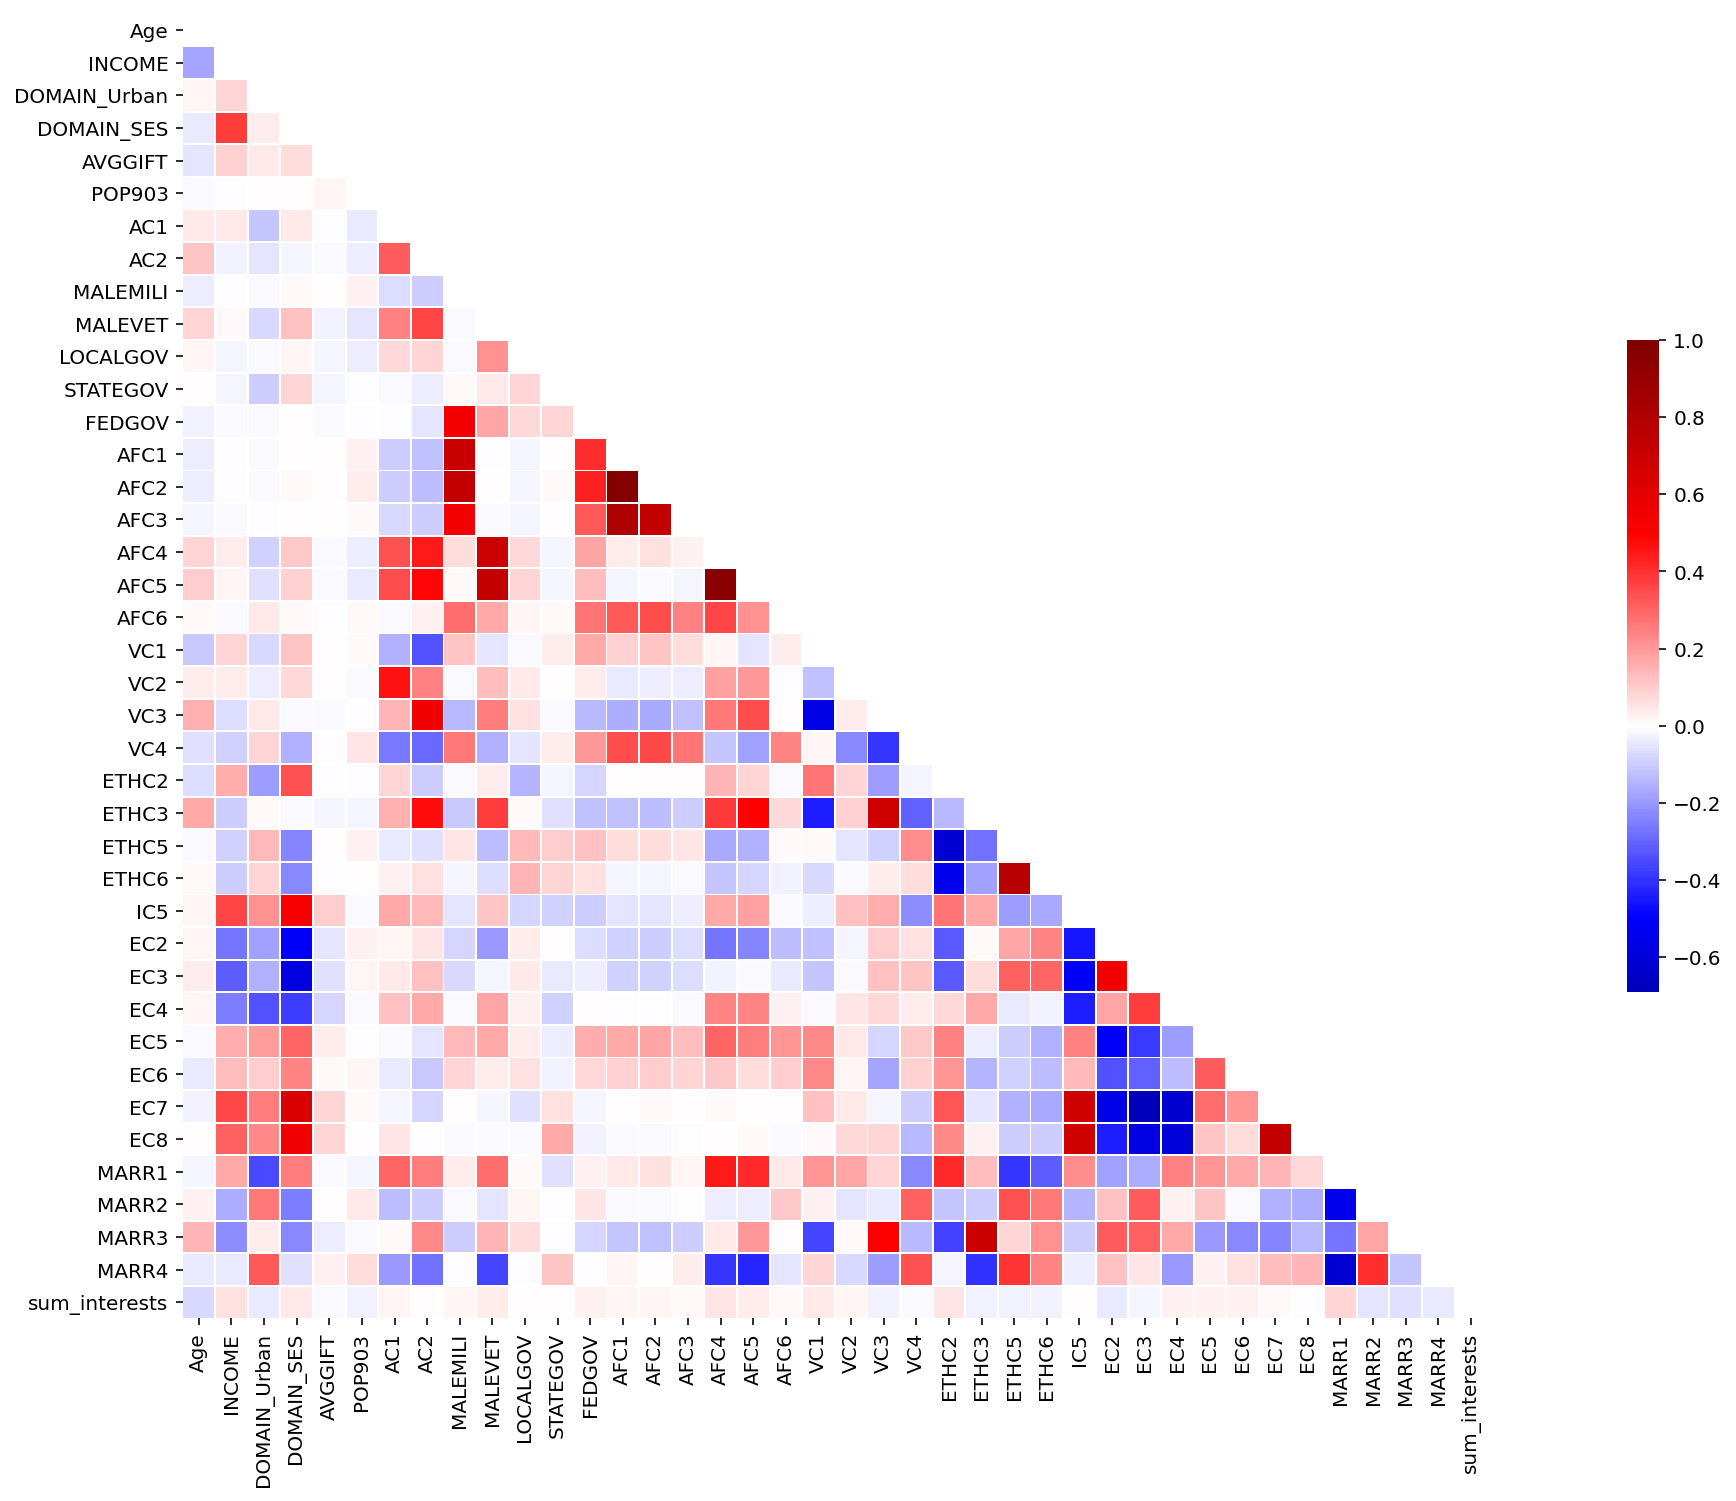

In [50]:
heatmap(data[metric_features],'pearson')

It's hard to interpret quickly because it has too many features!
In order to solve this problem, it was decided to implement some dimensionality reduction techniques to make the heatmap more "readable"

### Data Visualization 

Sometimes, it's easier to have a quick understanding of the data by visualizing it. It was decided to explore what it was talked about previously in Process Thought Section by plotting some variables/features to have some first insights of the donors behaviour.

#### Amount of Donation in $ for State

In [51]:
state_ramntall = data[['STATE','RAMNTALL']].groupby(by = ['STATE']).sum().sort_values(by = ['RAMNTALL'], ascending = False).reset_index()
#state_ramntall

In [52]:
fig = go.Figure(data=go.Choropleth(
    locations=state_ramntall['STATE'], # Spatial coordinates
    z = state_ramntall['RAMNTALL'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'greens',
    colorbar_title = "Amount of Donations in $",
))

fig.update_layout(
    title_text = 'PVA donations amount in $ by US County',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

#### Age importance for donations

In [53]:
bins = [18, 30, 40, 50, 60, 70, 80,120]
labels = ['0-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']
data['AgeRange'] = pd.cut(data.Age, bins, labels = labels,include_lowest = True)

findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=15.0.
findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBolIta.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymReg.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'DejaVu Serif Display' (DejaVuSerifDisplay.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXNonUnicode' (STIXNonUni.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Bold.ttf) normal normal 700 normal>) = 2.335
findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'STIX

findfont: score(<Font 'Sitka Small' (SitkaZ.ttc) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Cambria' (cambriaz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Yu Gothic' (YuGothL.ttc) normal normal 300 normal>) = 10.145
findfont: score(<Font 'Microsoft JhengHei' (msjhl.ttc) normal normal 290 normal>) = 10.1545
findfont: score(<Font 'Calibri' (calibrili.ttf) italic normal 300 normal>) = 11.145
findfont: score(<Font 'Calibri' (calibril.ttf) normal normal 300 normal>) = 10.145
findfont: score(<Font 'Myriad Pro' (MyriadPro-Cond.otf) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Letter Gothic Std' (LetterGothicStd-BoldSlanted.otf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Adobe Kaiti Std' (AdobeKaitiStd-Regular.otf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Verdana' (verdanab.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Letter Gothic Std' (LetterGothicStd-Slanted.otf) italic normal 400 normal>

findfont: score(<Font 'Rosewood Std' (RosewoodStd-Regular.otf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Malgun Gothic' (malgun.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Myriad Pro' (MyriadPro-CondIt.otf) italic normal 400 condensed>) = 11.25
findfont: score(<Font 'Cambria' (cambriai.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Myanmar Text' (mmrtext.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Microsoft New Tai Lue' (ntailub.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'MS Outlook' (OUTLOOK.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Comic Sans MS' (comici.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Nueva Std' (NuevaStd-Bold.otf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Kozuka Gothic Pro' (KozGoPro-Regular.otf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Myriad Arabic' (MyriadArabic-It.otf) italic normal 400 normal>) = 11.05


findfont: score(<Font 'Cooper Std' (CooperBlackStd-Italic.otf) italic normal 900 normal>) = 11.525
findfont: score(<Font 'Kozuka Mincho Pr6N' (KozMinPr6N-ExtraLight.otf) normal normal 250 normal>) = 10.1925
findfont: score(<Font 'Segoe MDL2 Assets' (segmdl2.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Sitka Small' (SitkaZ.ttc) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Times New Roman' (times.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Minion Pro' (MinionPro-BoldIt.otf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Palatino Linotype' (palabi.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Microsoft Tai Le' (taile.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Microsoft YaHei' (msyhbd.ttc) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Giddyup Std' (GiddyupStd.otf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Segoe UI' (seguisli.ttf) italic normal 350 normal>) = 11.

findfont: score(<Font 'Century' (CENTURY.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Verdana' (verdana.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Orator Std' (OratorStd.otf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'SimSun' (simsun.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Segoe UI' (segoeuib.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Myriad Pro' (MyriadPro-Semibold.otf) normal normal 600 normal>) = 10.24
findfont: score(<Font 'SimSun-ExtB' (simsunb.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Hobo Std' (HoboStd.otf) normal normal 500 normal>) = 10.145
findfont: score(<Font 'Candara' (Candarab.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Webdings' (webdings.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Microsoft Tai Le' (taile.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Kozuka Mincho Pr6N' (KozMinPr6N-Light.otf) normal

findfont: score(<Font 'Myriad Pro' (MyriadPro-It.otf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Nueva Std' (NuevaStd-Bold.otf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Calibri' (calibri.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Minion Pro' (MinionPro-BoldCn.otf) normal normal 700 condensed>) = 10.535
findfont: score(<Font 'Myriad Pro' (MyriadPro-It.otf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Cambria' (cambriai.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Adobe Caslon Pro' (ACaslonPro-Bold.otf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Adobe Hebrew' (AdobeHebrew-BoldItalic.otf) italic normal 600 normal>) = 11.24
findfont: score(<Font 'Segoe MDL2 Assets' (segmdl2.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Kozuka Mincho Pr6N' (KozMinPr6N-Medium.otf) normal normal 500 normal>) = 10.145
findfont: score(<Font 'Orator Std' (OratorStd.otf) normal normal 400 normal>) 

findfont: score(<Font 'Kozuka Mincho Pro' (KozMinPro-Heavy.otf) normal normal 900 normal>) = 10.525
findfont: score(<Font 'Segoe UI' (seguili.ttf) italic normal 300 normal>) = 11.145
findfont: score(<Font 'Corbel' (corbeli.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Adobe Hebrew' (AdobeHebrew-Bold.otf) normal normal 600 normal>) = 10.24
findfont: score(<Font 'Adobe Ming Std' (AdobeMingStd-Light.otf) normal normal 300 normal>) = 10.145
findfont: score(<Font 'Palatino Linotype' (palai.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Century Gothic' (GOTHICB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Bahnschrift' (bahnschrift.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Candara' (Candaraz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Kozuka Gothic Pro' (KozGoPro-Heavy.otf) normal normal 900 normal>) = 10.525
findfont: score(<Font 'Myriad Pro' (MyriadPro-Regular.otf) normal normal 400 normal>) = 10.05

findfont: score(<Font 'Adobe Caslon Pro' (ACaslonPro-SemiboldItalic.otf) italic normal 600 normal>) = 11.24
findfont: score(<Font 'Kozuka Mincho Pro' (KozMinPro-Regular.otf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Book Antiqua' (ANTQUABI.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Kozuka Gothic Pr6N' (KozGoPr6N-Medium.otf) normal normal 500 normal>) = 10.145
findfont: score(<Font 'Kozuka Gothic Pro' (KozGoPro-Light.otf) normal normal 300 normal>) = 10.145
findfont: score(<Font 'Times New Roman' (timesbd.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Microsoft JhengHei' (msjhl.ttc) normal normal 290 normal>) = 10.1545
findfont: score(<Font 'Calibri' (calibrib.ttf) normal normal 700 normal>) = 10.335
findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=15.0 to Arial ('C:\\Windows\\Fonts\\arial.ttf') with score of 0.050000.
findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal

findfont: score(<Font 'Malgun Gothic' (malgun.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Adobe Fangsong Std' (AdobeFangsongStd-Regular.otf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Giddyup Std' (GiddyupStd.otf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bookman Old Style' (BOOKOSB.TTF) normal normal 600 normal>) = 10.24
findfont: score(<Font 'Adobe Garamond Pro' (AGaramondPro-Bold.otf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Kozuka Mincho Pr6N' (KozMinPr6N-Bold.otf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Adobe Arabic' (AdobeArabic-Bold.otf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Segoe UI Historic' (seguihis.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Minion Pro' (MinionPro-BoldCnIt.otf) italic normal 700 condensed>) = 11.535
findfont: score(<Font 'Trebuchet MS' (trebucbi.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Sitka Small' (SitkaZ.ttc

findfont: score(<Font 'Century Gothic' (GOTHICI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Segoe UI' (segoeuil.ttf) normal normal 300 normal>) = 10.145
findfont: score(<Font 'Georgia' (georgiaz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'MS LineDraw' (Linedraw.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Candara' (Candarab.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Myriad Pro' (MyriadPro-BoldIt.otf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Letter Gothic Std' (LetterGothicStd-BoldSlanted.otf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'HoloLens MDL2 Assets' (holomdl2.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Kozuka Mincho Pr6N' (KozMinPr6N-Bold.otf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Kozuka Gothic Pro' (KozGoPro-Light.otf) normal normal 300 normal>) = 10.145
findfont: score(<Font 'Rosewood Std' (RosewoodStd-Regular.otf) normal norma

findfont: score(<Font 'Adobe Naskh' (AdobeNaskh-Medium.otf) normal normal 500 normal>) = 10.145
findfont: score(<Font 'OCR A Std' (OCRAStd.otf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Leelawadee UI' (LeelaUIb.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Nueva Std' (NuevaStd-BoldCondItalic.otf) italic normal 700 condensed>) = 11.535
findfont: score(<Font 'Sitka Small' (SitkaI.ttc) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Myriad Arabic' (MyriadArabic-BoldIt.otf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Trebuchet MS' (trebuc.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Impact' (impact.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Nirmala UI' (Nirmala.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Arial' (ARIALNBI.TTF) italic normal 700 condensed>) = 1.535
findfont: score(<Font 'Cooper Std' (CooperBlackStd-Italic.otf) italic normal 900 normal>) = 11.525
findfont: score

findfont: score(<Font 'Arial' (ARIALN.TTF) normal normal 400 condensed>) = 0.25
findfont: score(<Font 'Courier New' (cour.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Malgun Gothic' (malgunsl.ttf) normal normal 300 normal>) = 10.145
findfont: score(<Font 'Minion Pro' (MinionPro-BoldIt.otf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Kozuka Gothic Pro' (KozGoPro-Heavy.otf) normal normal 900 normal>) = 10.525
findfont: score(<Font 'Adobe Caslon Pro' (ACaslonPro-BoldItalic.otf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Adobe Arabic' (AdobeArabic-Regular.otf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Consolas' (consolai.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Constantia' (constan.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Palatino Linotype' (palabi.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Century' (CENTURY.TTF) normal normal 400 normal>) = 10.05
findfont: scor

findfont: score(<Font 'Ebrima' (ebrimabd.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Segoe UI Symbol' (seguisym.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'ZWAdobeF' (ZWAdobeF.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Arial' (ARIALNB.TTF) normal normal 700 condensed>) = 0.5349999999999999
findfont: score(<Font 'Segoe UI' (segoeuiz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Minion Pro' (MinionPro-Medium.otf) normal normal 500 normal>) = 10.145
findfont: score(<Font 'Arial' (ARIALNBI.TTF) italic normal 700 condensed>) = 1.535
findfont: score(<Font 'Adobe Myungjo Std' (AdobeMyungjoStd-Medium.otf) normal normal 500 normal>) = 10.145
findfont: score(<Font 'Comic Sans MS' (comicbd.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Arial' (ARIALNB.TTF) normal normal 700 condensed>) = 0.5349999999999999
findfont: score(<Font 'Myriad Pro' (MyriadPro-It.otf) italic normal 400 normal>) = 11.05
findfont: 

findfont: score(<Font 'Palatino Linotype' (pala.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bahnschrift' (bahnschrift.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Constantia' (constani.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Chaparral Pro' (ChaparralPro-Bold.otf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Brush Script Std' (BrushScriptStd.otf) normal normal 500 normal>) = 10.145
findfont: score(<Font 'MS Outlook' (OUTLOOK.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'MingLiU-ExtB' (mingliub.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Arial' (ariali.ttf) italic normal 400 normal>) = 1.05
findfont: score(<Font 'MS Gothic' (msgothic.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Sitka Small' (SitkaB.ttc) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Kozuka Mincho Pro' (KozMinPro-Heavy.otf) normal normal 900 normal>) = 10.525
findfont: score(<Font 'Se

findfont: score(<Font 'Birch Std' (BirchStd.otf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Adobe Heiti Std' (AdobeHeitiStd-Regular.otf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Book Antiqua' (ANTQUAI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Yu Gothic' (YuGothB.ttc) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Segoe UI Historic' (seguihis.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Sitka Small' (Sitka.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Kozuka Gothic Pr6N' (KozGoPr6N-Regular.otf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Segoe UI' (seguisbi.ttf) italic normal 600 normal>) = 11.24
findfont: score(<Font 'Georgia' (georgiai.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Arial' (ARIALN.TTF) normal normal 400 condensed>) = 0.25
findfont: score(<Font 'Adobe Caslon Pro' (ACaslonPro-SemiboldItalic.otf) italic normal 600 normal>) = 11.24
findfont: sco

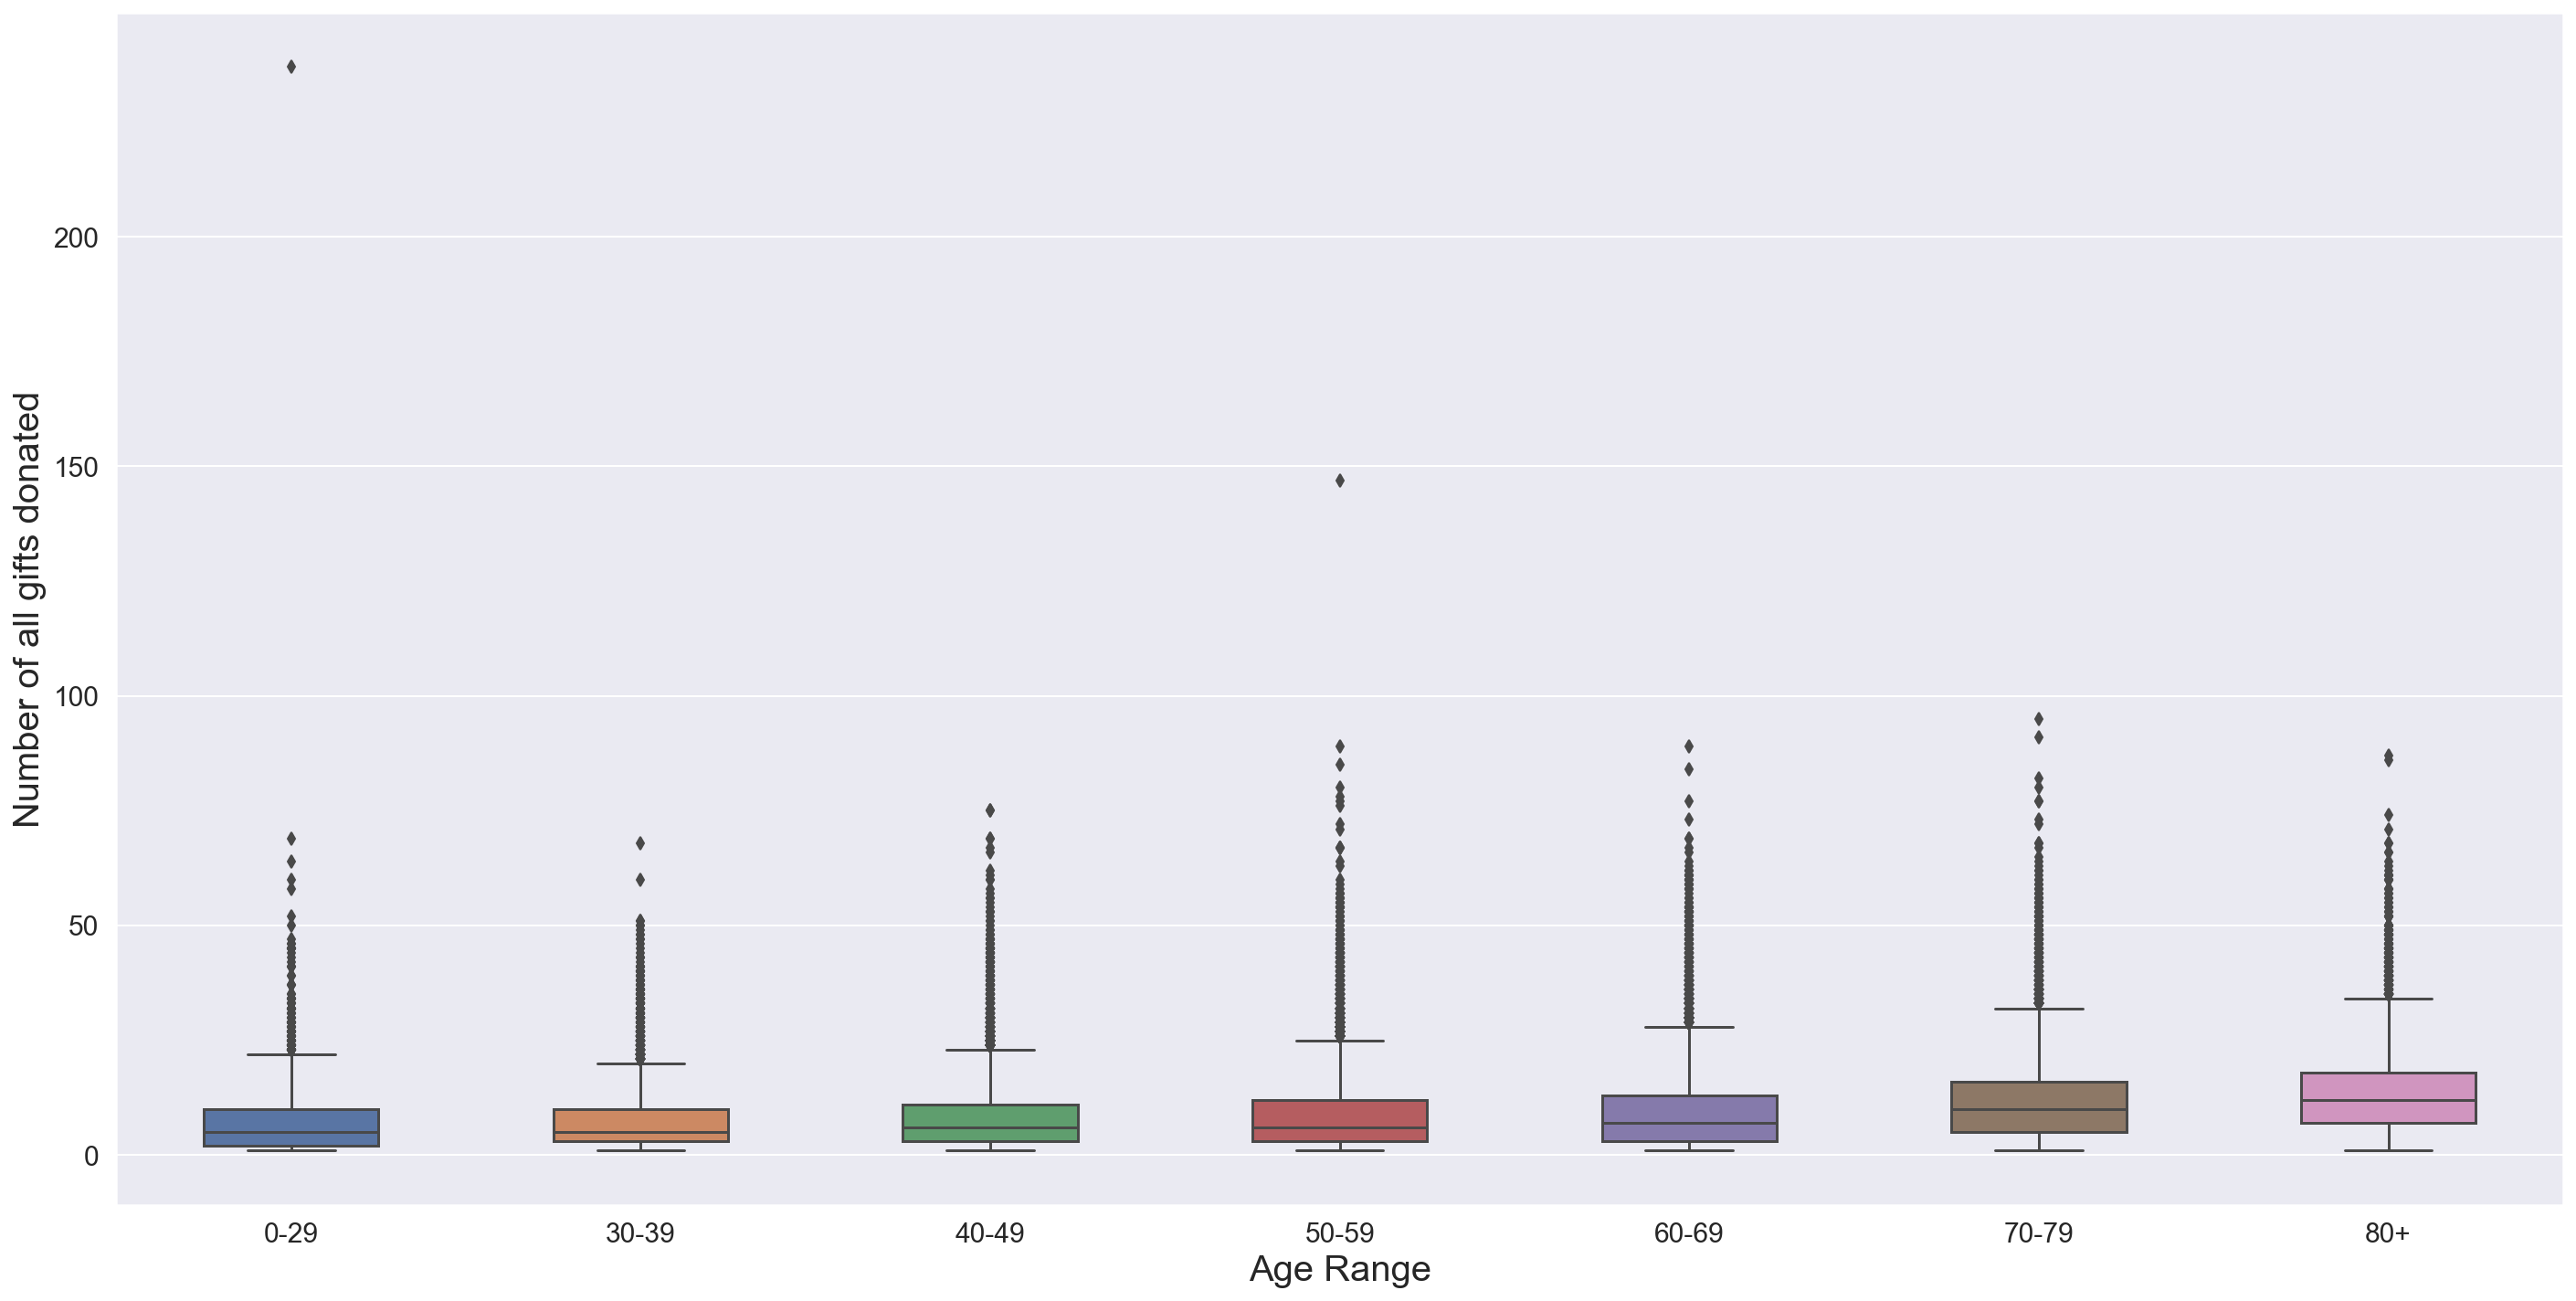

In [54]:
sns.set(rc={'figure.figsize': (24,12)})
ax = sns.boxplot(y='NGIFTALL', x='AgeRange', data=data, width = 0.5)

ax.set_xlabel("Age Range",fontsize=20)
ax.set_ylabel("Number of all gifts donated",fontsize=20)
ax.tick_params(labelsize=15)


plt.show()

#### Gender Distribution

findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=11.0.
findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBolIta.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymReg.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'DejaVu Serif Display' (DejaVuSerifDisplay.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXNonUnicode' (STIXNonUni.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Bold.ttf) normal normal 700 normal>) = 2.335
findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'STIX

findfont: score(<Font 'Sitka Small' (SitkaZ.ttc) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Cambria' (cambriaz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Yu Gothic' (YuGothL.ttc) normal normal 300 normal>) = 10.145
findfont: score(<Font 'Microsoft JhengHei' (msjhl.ttc) normal normal 290 normal>) = 10.1545
findfont: score(<Font 'Calibri' (calibrili.ttf) italic normal 300 normal>) = 11.145
findfont: score(<Font 'Calibri' (calibril.ttf) normal normal 300 normal>) = 10.145
findfont: score(<Font 'Myriad Pro' (MyriadPro-Cond.otf) normal normal 400 condensed>) = 10.25
findfont: score(<Font 'Letter Gothic Std' (LetterGothicStd-BoldSlanted.otf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Adobe Kaiti Std' (AdobeKaitiStd-Regular.otf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Verdana' (verdanab.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Letter Gothic Std' (LetterGothicStd-Slanted.otf) italic normal 400 normal>

findfont: score(<Font 'Rosewood Std' (RosewoodStd-Regular.otf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Malgun Gothic' (malgun.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Myriad Pro' (MyriadPro-CondIt.otf) italic normal 400 condensed>) = 11.25
findfont: score(<Font 'Cambria' (cambriai.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Myanmar Text' (mmrtext.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Microsoft New Tai Lue' (ntailub.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'MS Outlook' (OUTLOOK.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Comic Sans MS' (comici.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Nueva Std' (NuevaStd-Bold.otf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Kozuka Gothic Pro' (KozGoPro-Regular.otf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Myriad Arabic' (MyriadArabic-It.otf) italic normal 400 normal>) = 11.05


findfont: score(<Font 'Cooper Std' (CooperBlackStd-Italic.otf) italic normal 900 normal>) = 11.525
findfont: score(<Font 'Kozuka Mincho Pr6N' (KozMinPr6N-ExtraLight.otf) normal normal 250 normal>) = 10.1925
findfont: score(<Font 'Segoe MDL2 Assets' (segmdl2.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Sitka Small' (SitkaZ.ttc) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Times New Roman' (times.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Minion Pro' (MinionPro-BoldIt.otf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Palatino Linotype' (palabi.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Microsoft Tai Le' (taile.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Microsoft YaHei' (msyhbd.ttc) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Giddyup Std' (GiddyupStd.otf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Segoe UI' (seguisli.ttf) italic normal 350 normal>) = 11.

findfont: score(<Font 'Century' (CENTURY.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Verdana' (verdana.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Orator Std' (OratorStd.otf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'SimSun' (simsun.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Segoe UI' (segoeuib.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Myriad Pro' (MyriadPro-Semibold.otf) normal normal 600 normal>) = 10.24
findfont: score(<Font 'SimSun-ExtB' (simsunb.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Hobo Std' (HoboStd.otf) normal normal 500 normal>) = 10.145
findfont: score(<Font 'Candara' (Candarab.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Webdings' (webdings.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Microsoft Tai Le' (taile.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Kozuka Mincho Pr6N' (KozMinPr6N-Light.otf) normal

findfont: score(<Font 'Myriad Pro' (MyriadPro-It.otf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Nueva Std' (NuevaStd-Bold.otf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Calibri' (calibri.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Minion Pro' (MinionPro-BoldCn.otf) normal normal 700 condensed>) = 10.535
findfont: score(<Font 'Myriad Pro' (MyriadPro-It.otf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Cambria' (cambriai.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Adobe Caslon Pro' (ACaslonPro-Bold.otf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Adobe Hebrew' (AdobeHebrew-BoldItalic.otf) italic normal 600 normal>) = 11.24
findfont: score(<Font 'Segoe MDL2 Assets' (segmdl2.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Kozuka Mincho Pr6N' (KozMinPr6N-Medium.otf) normal normal 500 normal>) = 10.145
findfont: score(<Font 'Orator Std' (OratorStd.otf) normal normal 400 normal>) 

findfont: score(<Font 'Kozuka Mincho Pro' (KozMinPro-Heavy.otf) normal normal 900 normal>) = 10.525
findfont: score(<Font 'Segoe UI' (seguili.ttf) italic normal 300 normal>) = 11.145
findfont: score(<Font 'Corbel' (corbeli.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Adobe Hebrew' (AdobeHebrew-Bold.otf) normal normal 600 normal>) = 10.24
findfont: score(<Font 'Adobe Ming Std' (AdobeMingStd-Light.otf) normal normal 300 normal>) = 10.145
findfont: score(<Font 'Palatino Linotype' (palai.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Century Gothic' (GOTHICB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Bahnschrift' (bahnschrift.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Candara' (Candaraz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Kozuka Gothic Pro' (KozGoPro-Heavy.otf) normal normal 900 normal>) = 10.525
findfont: score(<Font 'Myriad Pro' (MyriadPro-Regular.otf) normal normal 400 normal>) = 10.05

findfont: score(<Font 'Adobe Caslon Pro' (ACaslonPro-SemiboldItalic.otf) italic normal 600 normal>) = 11.24
findfont: score(<Font 'Kozuka Mincho Pro' (KozMinPro-Regular.otf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Book Antiqua' (ANTQUABI.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Kozuka Gothic Pr6N' (KozGoPr6N-Medium.otf) normal normal 500 normal>) = 10.145
findfont: score(<Font 'Kozuka Gothic Pro' (KozGoPro-Light.otf) normal normal 300 normal>) = 10.145
findfont: score(<Font 'Times New Roman' (timesbd.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Microsoft JhengHei' (msjhl.ttc) normal normal 290 normal>) = 10.1545
findfont: score(<Font 'Calibri' (calibrib.ttf) normal normal 700 normal>) = 10.335
findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=11.0 to Arial ('C:\\Windows\\Fonts\\arial.ttf') with score of 0.050000.
findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal

findfont: score(<Font 'Malgun Gothic' (malgun.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Adobe Fangsong Std' (AdobeFangsongStd-Regular.otf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Giddyup Std' (GiddyupStd.otf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bookman Old Style' (BOOKOSB.TTF) normal normal 600 normal>) = 10.24
findfont: score(<Font 'Adobe Garamond Pro' (AGaramondPro-Bold.otf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Kozuka Mincho Pr6N' (KozMinPr6N-Bold.otf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Adobe Arabic' (AdobeArabic-Bold.otf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Segoe UI Historic' (seguihis.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Minion Pro' (MinionPro-BoldCnIt.otf) italic normal 700 condensed>) = 11.535
findfont: score(<Font 'Trebuchet MS' (trebucbi.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Sitka Small' (SitkaZ.ttc

findfont: score(<Font 'Century Gothic' (GOTHICI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Segoe UI' (segoeuil.ttf) normal normal 300 normal>) = 10.145
findfont: score(<Font 'Georgia' (georgiaz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'MS LineDraw' (Linedraw.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Candara' (Candarab.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Myriad Pro' (MyriadPro-BoldIt.otf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Letter Gothic Std' (LetterGothicStd-BoldSlanted.otf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'HoloLens MDL2 Assets' (holomdl2.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Kozuka Mincho Pr6N' (KozMinPr6N-Bold.otf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Kozuka Gothic Pro' (KozGoPro-Light.otf) normal normal 300 normal>) = 10.145
findfont: score(<Font 'Rosewood Std' (RosewoodStd-Regular.otf) normal norma

findfont: score(<Font 'Adobe Naskh' (AdobeNaskh-Medium.otf) normal normal 500 normal>) = 10.145
findfont: score(<Font 'OCR A Std' (OCRAStd.otf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Leelawadee UI' (LeelaUIb.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Nueva Std' (NuevaStd-BoldCondItalic.otf) italic normal 700 condensed>) = 11.535
findfont: score(<Font 'Sitka Small' (SitkaI.ttc) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Myriad Arabic' (MyriadArabic-BoldIt.otf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Trebuchet MS' (trebuc.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Impact' (impact.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Nirmala UI' (Nirmala.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Arial' (ARIALNBI.TTF) italic normal 700 condensed>) = 1.535
findfont: score(<Font 'Cooper Std' (CooperBlackStd-Italic.otf) italic normal 900 normal>) = 11.525
findfont: score

findfont: score(<Font 'Arial' (ARIALN.TTF) normal normal 400 condensed>) = 0.25
findfont: score(<Font 'Courier New' (cour.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Malgun Gothic' (malgunsl.ttf) normal normal 300 normal>) = 10.145
findfont: score(<Font 'Minion Pro' (MinionPro-BoldIt.otf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Kozuka Gothic Pro' (KozGoPro-Heavy.otf) normal normal 900 normal>) = 10.525
findfont: score(<Font 'Adobe Caslon Pro' (ACaslonPro-BoldItalic.otf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Adobe Arabic' (AdobeArabic-Regular.otf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Consolas' (consolai.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Constantia' (constan.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Palatino Linotype' (palabi.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Century' (CENTURY.TTF) normal normal 400 normal>) = 10.05
findfont: scor

findfont: score(<Font 'Ebrima' (ebrimabd.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Segoe UI Symbol' (seguisym.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'ZWAdobeF' (ZWAdobeF.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Arial' (ARIALNB.TTF) normal normal 700 condensed>) = 0.5349999999999999
findfont: score(<Font 'Segoe UI' (segoeuiz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Minion Pro' (MinionPro-Medium.otf) normal normal 500 normal>) = 10.145
findfont: score(<Font 'Arial' (ARIALNBI.TTF) italic normal 700 condensed>) = 1.535
findfont: score(<Font 'Adobe Myungjo Std' (AdobeMyungjoStd-Medium.otf) normal normal 500 normal>) = 10.145
findfont: score(<Font 'Comic Sans MS' (comicbd.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Arial' (ARIALNB.TTF) normal normal 700 condensed>) = 0.5349999999999999
findfont: score(<Font 'Myriad Pro' (MyriadPro-It.otf) italic normal 400 normal>) = 11.05
findfont: 

findfont: score(<Font 'Palatino Linotype' (pala.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bahnschrift' (bahnschrift.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Constantia' (constani.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Chaparral Pro' (ChaparralPro-Bold.otf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Brush Script Std' (BrushScriptStd.otf) normal normal 500 normal>) = 10.145
findfont: score(<Font 'MS Outlook' (OUTLOOK.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'MingLiU-ExtB' (mingliub.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Arial' (ariali.ttf) italic normal 400 normal>) = 1.05
findfont: score(<Font 'MS Gothic' (msgothic.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Sitka Small' (SitkaB.ttc) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Kozuka Mincho Pro' (KozMinPro-Heavy.otf) normal normal 900 normal>) = 10.525
findfont: score(<Font 'Se

findfont: score(<Font 'Birch Std' (BirchStd.otf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Adobe Heiti Std' (AdobeHeitiStd-Regular.otf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Book Antiqua' (ANTQUAI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Yu Gothic' (YuGothB.ttc) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Segoe UI Historic' (seguihis.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Sitka Small' (Sitka.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Kozuka Gothic Pr6N' (KozGoPr6N-Regular.otf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Segoe UI' (seguisbi.ttf) italic normal 600 normal>) = 11.24
findfont: score(<Font 'Georgia' (georgiai.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Arial' (ARIALN.TTF) normal normal 400 condensed>) = 0.25
findfont: score(<Font 'Adobe Caslon Pro' (ACaslonPro-SemiboldItalic.otf) italic normal 600 normal>) = 11.24
findfont: sco

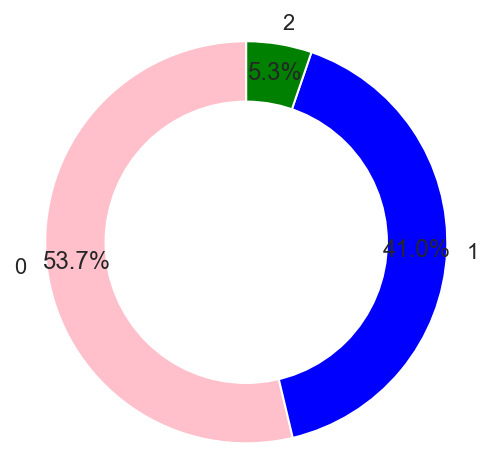

In [55]:
#0 --> Female / 1--> Male / 2 --> Joint Account(not specified)
labels = [0,1,2]
sizes = [data.query('GENDER == 0').GENDER.count(),data.query('GENDER == 1').GENDER.count(),data.query('GENDER == 2').GENDER.count()]
#colors
colors = ['pink','blue','green']
#explsion
explode = (0.05,0.05)
plt.figure(figsize=(4,4)) 
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
p=plt.gcf()
plt.axis('equal')
p.gca().add_artist(my_circle)
plt.show()

#### Veterans Contributions

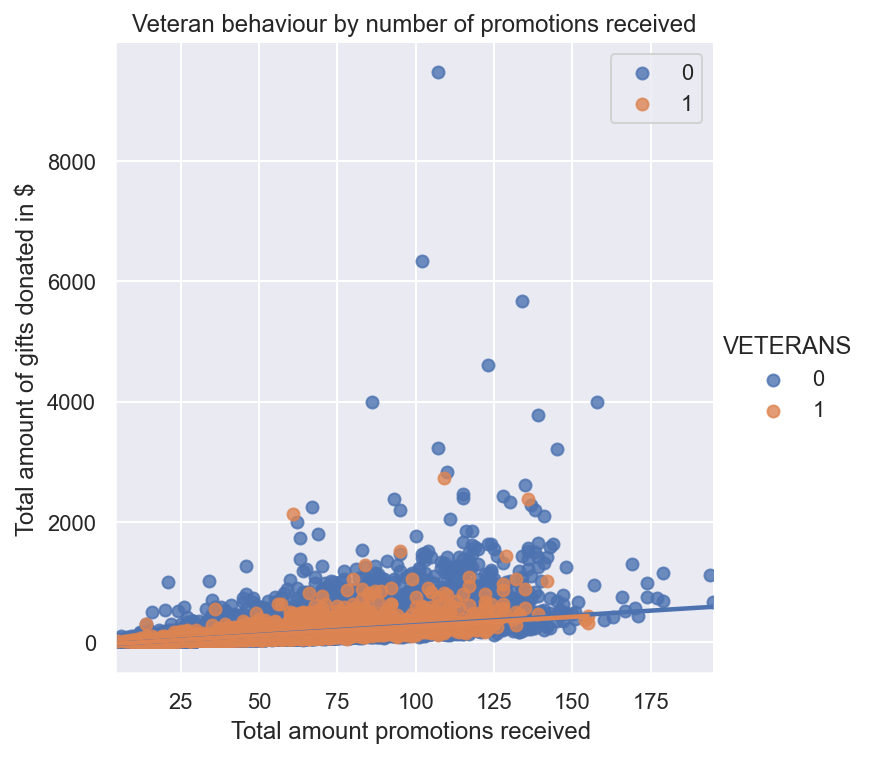

In [56]:
sns.set(rc={'figure.figsize': (24,12)})

ax_reg1 = sns.lmplot(x='NUMPROM', y='RAMNTALL', hue="VETERANS",data=data)

plt.legend()
plt.xlabel("Total amount promotions received ")
plt.ylabel("Total amount of gifts donated in $")
plt.title('Veteran behaviour by number of promotions received')
plt.show()


#### Veteran / Non Veteran 

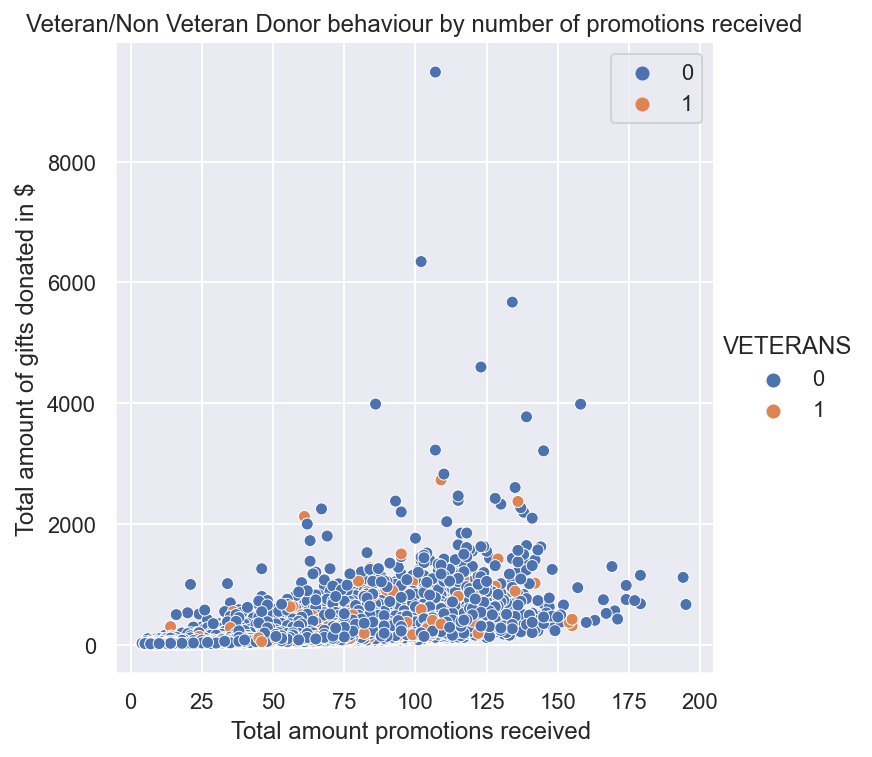

In [57]:
sns.set(rc={'figure.figsize': (24,12)})

ax_reg2 = sns.relplot(x='NUMPROM', y='RAMNTALL', hue="VETERANS",data=data)

plt.legend()
plt.xlabel("Total amount promotions received ")
plt.ylabel("Total amount of gifts donated in $")
plt.title('Veteran/Non Veteran Donor behaviour by number of promotions received')
plt.show()


#### Religious Contributions

In [ ]:
# Being Veteran and Religious --> not too much
sns.set()
categorical_features_counts = data\
    .groupby(['BIBLE', 'VETERANS'])\
    .size()\
    .unstack()\
    .plot.bar(stacked=True)

### Feature Engineering/Dimensionality reduction

After watching the heatmap above relative to the correlation between the selected features, since some variables got really high values of correlation, it was decided to try a dimensionality reduction technique called Principal Component Analysis(PCA),where features that are highly correlated will be grouped in new features(components) that are not linearly correlated with each other and where the variance will be larger from the first to the last.
- IC5/EIC(1-16)/IC5/EC(2-8)/MARR(1-4)
- AFC/VC/FEDGOV/STATEGOV/LOCALGOV/MALEVET

Since using IQR method for identify/remove outliers, gives a prediction of 72% of "useful/clean" data(without any outlier), it was decided that, it would make more sense to use Robust Scaler to mitigate the information loss that could have happen if IQR method was used.

#### Data normalization

It was decided to remove Domain SES and Domain Urban(both ordinal features);

In [ ]:
individual_metric = {'Age','INCOME','DOMAIN_Urban','DOMAIN_SES','AVGGIFT','sum_interests'}

metric_features = [e for e in metric_features if e not in individual_metric]


In [ ]:
# Use MinMaxScaler to scale the data
robust_scaler = RobustScaler()
robust_scaled_feat = robust_scaler.fit_transform(data[metric_features])
robust_scaled_feat

In [ ]:
data[metric_features] = robust_scaled_feat
data[metric_features]

In [ ]:
df1_pca = data[['DOMAIN_Urban','IC5','EC2','EC3','EC4','EC5','EC6','EC7','MARR1','MARR2','MARR3','MARR4']]
df2_pca = data[['AC1','AC2','MALEMILI','MALEVET','LOCALGOV','STATEGOV','FEDGOV','AFC1','AFC2','AFC3','AFC4','AFC5','AFC6','VC1','VC2','VC3','VC4']]
df3_pca = data[['EIC1','EIC2','EIC3','EIC4','EIC5','EIC6','EIC7','EIC8','EIC9','EIC10','EIC11','EIC12','EIC13','EIC14','EIC15','EIC16']]

In [ ]:
df1_pca_features = df1_pca.columns.to_list()
df2_pca_features = df2_pca.columns.to_list()
#df3_pca_features = df3_pca.columns.to_list()

#### First PCA

In [ ]:
pca = PCA()
pca1_feat = pca.fit_transform(df1_pca)
pca1_feat  # What is this output?

In [ ]:
cov_matrix1 = df1_pca.cov()
cov_matrix1

In [ ]:
# Composing back the covariance matrix
pd.DataFrame(pca.components_.T @ np.diag(pca.explained_variance_) @ pca.components_, 
             index=cov_matrix1.index, 
             columns=cov_matrix1.columns)

In [ ]:
# Obtaining the projected observations on the principal components axes (linear combinations)
pd.DataFrame(df1_pca.values @ pca.components_.T, 
             index=df1_pca.index,
             columns=[f"PC{i}" for i in range(pca.n_components_)])

In [ ]:
# Output PCA table
pd.DataFrame(
    {"Eigenvalue": pca.explained_variance_,
     "Difference": np.insert(np.diff(pca.explained_variance_), 0, 0),
     "Proportion": pca.explained_variance_ratio_,
     "Cumulative": np.cumsum(pca.explained_variance_ratio_)},
    index=range(1, pca.n_components_ + 1)
)

In [ ]:
# figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# draw plots
ax1.plot(pca.explained_variance_, marker=".", markersize=12)
ax2.plot(pca.explained_variance_ratio_, marker=".", markersize=12, label="Proportion")
ax2.plot(np.cumsum(pca.explained_variance_ratio_), marker=".", markersize=12, linestyle="--", label="Cumulative")

# customizations
ax2.legend()
ax1.set_title("Scree Plot", fontsize=14)
ax2.set_title("Variance Explained", fontsize=14)
ax1.set_ylabel("Eigenvalue")
ax2.set_ylabel("Proportion")
ax1.set_xlabel("Components")
ax2.set_xlabel("Components")
ax1.set_xticks(range(0, pca.n_components_, 2))
ax1.set_xticklabels(range(1, pca.n_components_ + 1, 2))
ax2.set_xticks(range(0, pca.n_components_, 2))
ax2.set_xticklabels(range(1, pca.n_components_ + 1, 2))

plt.show()

In [ ]:
# Perform PCA again with the number of principal components you want to retain
pca = PCA(n_components=4)
pca_feat = pca.fit_transform(df1_pca)
pca_feat_names = [f"PC{i}" for i in range(pca.n_components_)]
pca_df1 = pd.DataFrame(pca_feat, index=df1_pca.index, columns=pca_feat_names)  # remember index=df_pca.index
pca_df1

In [ ]:
df1_pca = pd.concat([df1_pca, pca_df1], axis=1)
df1_pca.head()

In [ ]:
def _color_red_or_green(val):
    if val < -0.45:
        color = 'background-color: red'
    elif val > 0.45:
        color = 'background-color: green'
    else:
        color = ''
    return color

# Interpreting each Principal Component
loadings = df1_pca.corr().loc[pca_feat_names]
loadings.drop(['PC0','PC1','PC2','PC3'],axis = 1, inplace = True)
loadings.style.applymap(_color_red_or_green)

Conclusions from first pca:
- PC0: Higher SES, Higher Income, Higher Neighbourhood Income, Higher Education,Higher % People Married
- PC1: Higher Domain Urban, More frequent Higher Education, Higher % of Divorced/Separated and Single/Not married
- PC2: Both low education/higher education(standard neighbourhood) , Highest % Widow People that can inflate the IC5
- PC3: Lower Domain Urban, Low lvl of edcation

In [ ]:
pca_df1.rename(columns = {'PC0': 'Rich_Neigh','PC1':'Single_Neigh', 'PC2':'Standard_Neigh','PC3':'Poor/Lower Neigh'},inplace = True)

#### Second Data

In [ ]:
pca = PCA()


In [ ]:
pca2_feat = pca.fit_transform(df2_pca)
pca2_feat  # What is this output?
#cov
cov_matrix2 = df2_pca.cov()
cov_matrix2

In [ ]:
pd.DataFrame(pca.components_.T @ np.diag(pca.explained_variance_) @ pca.components_, 
             index=cov_matrix2.index, 
             columns=cov_matrix2.columns)

In [ ]:
pd.DataFrame(df2_pca.values @ pca.components_.T, 
             index=df2_pca.index,
             columns=[f"PC{i}" for i in range(pca.n_components_)])

In [ ]:
# Output PCA table
pd.DataFrame(
    {"Eigenvalue": pca.explained_variance_,
     "Difference": np.insert(np.diff(pca.explained_variance_), 0, 0),
     "Proportion": pca.explained_variance_ratio_,
     "Cumulative": np.cumsum(pca.explained_variance_ratio_)},
    index=range(1, pca.n_components_ + 1)
)

In [ ]:
# figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# draw plots
ax1.plot(pca.explained_variance_, marker=".", markersize=12)
ax2.plot(pca.explained_variance_ratio_, marker=".", markersize=12, label="Proportion")
ax2.plot(np.cumsum(pca.explained_variance_ratio_), marker=".", markersize=12, linestyle="--", label="Cumulative")

# customizations
ax2.legend()
ax1.set_title("Scree Plot", fontsize=14)
ax2.set_title("Variance Explained", fontsize=14)
ax1.set_ylabel("Eigenvalue")
ax2.set_ylabel("Proportion")
ax1.set_xlabel("Components")
ax2.set_xlabel("Components")
ax1.set_xticks(range(0, pca.n_components_, 2))
ax1.set_xticklabels(range(1, pca.n_components_ + 1, 2))
ax2.set_xticks(range(0, pca.n_components_, 2))
ax2.set_xticklabels(range(1, pca.n_components_ + 1, 2))

plt.show()

In [ ]:
# Perform PCA again with the number of principal components you want to retain
pca = PCA(n_components=4)
pca_feat = pca.fit_transform(df2_pca)
pca_feat_names = [f"PC{i}" for i in range(pca.n_components_)]
pca_df2 = pd.DataFrame(pca_feat, index=df2_pca.index, columns=pca_feat_names)  # remember index=df_pca.index
pca_df2

In [ ]:
df2_pca = pd.concat([df2_pca, pca_df2], axis=1)
df2_pca.head()

In [ ]:
def _color_red_or_green(val):
    if val < -0.45:
        color = 'background-color: red'
    elif val > 0.45:
        color = 'background-color: green'
    else:
        color = ''
    return color

# Interpreting each Principal Component
loadings = df2_pca.corr().loc[pca_feat_names]
loadings.drop(['PC0','PC1','PC2','PC3'],axis = 1, inplace = True)
loadings.style.applymap(_color_red_or_green)

- PC0 -->  Adults with more than 55 years(neighbourhood), High % MaleVET in the neighbourhood,Percent WW2 Age 16+;
- PC1 --> Younger people living around, Active Militar lviing around,high %federal gov employers,%Veteransfrom IRAQ p.e;FED GOV
- PC2 --> Adults with age 55-59, Korean % Veteran,More relative to STATEGOV
- PC3 --> Adults with 55-59 , Vietnam War

In [ ]:
pca_df2.rename(columns = {'PC0':'WW2','PC1':'Fed_Act','PC2':'Korean','PC3':'Vietnam'}, inplace = True)

In [ ]:
pca_df2

#### Third Data

In [ ]:
df3_pca = data[['EIC1','EIC2','EIC3','EIC4','EIC5','EIC6','EIC7','EIC8','EIC9','EIC10','EIC11','EIC12','EIC13','EIC14','EIC15','EIC16']]

In [ ]:
pca = PCA()

In [ ]:
pca3_feat = pca.fit_transform(df3_pca)
pca3_feat  # What is this output?
#cov
cov_matrix3 = df3_pca.cov()
cov_matrix3

In [ ]:
pd.DataFrame(pca.components_.T @ np.diag(pca.explained_variance_) @ pca.components_, 
             index=cov_matrix3.index, 
             columns=cov_matrix3.columns)

In [ ]:
pd.DataFrame(df3_pca.values @ pca.components_.T, 
             index=df3_pca.index,
             columns=[f"PC{i}" for i in range(pca.n_components_)])

In [ ]:
# Output PCA table
pd.DataFrame(
    {"Eigenvalue": pca.explained_variance_,
     "Difference": np.insert(np.diff(pca.explained_variance_), 0, 0),
     "Proportion": pca.explained_variance_ratio_,
     "Cumulative": np.cumsum(pca.explained_variance_ratio_)},
    index=range(1, pca.n_components_ + 1)
)

In [ ]:
# figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# draw plots
ax1.plot(pca.explained_variance_, marker=".", markersize=12)
ax2.plot(pca.explained_variance_ratio_, marker=".", markersize=12, label="Proportion")
ax2.plot(np.cumsum(pca.explained_variance_ratio_), marker=".", markersize=12, linestyle="--", label="Cumulative")

# customizations
ax2.legend()
ax1.set_title("Scree Plot", fontsize=14)
ax2.set_title("Variance Explained", fontsize=14)
ax1.set_ylabel("Eigenvalue")
ax2.set_ylabel("Proportion")
ax1.set_xlabel("Components")
ax2.set_xlabel("Components")
ax1.set_xticks(range(0, pca.n_components_, 2))
ax1.set_xticklabels(range(1, pca.n_components_ + 1, 2))
ax2.set_xticks(range(0, pca.n_components_, 2))
ax2.set_xticklabels(range(1, pca.n_components_ + 1, 2))

plt.show()

In [ ]:
# Perform PCA again with the number of principal components you want to retain
pca = PCA(n_components=5)
pca_feat = pca.fit_transform(df3_pca)
pca_feat_names = [f"PC{i}" for i in range(pca.n_components_)]
pca_df3 = pd.DataFrame(pca_feat, index=df3_pca.index, columns=pca_feat_names)  # remember index=df_pca.index
pca_df3

In [ ]:
df3_pca = pd.concat([df3_pca, pca_df3], axis=1)
df3_pca.head()

In [ ]:
def _color_red_or_green(val):
    if val < -0.45:
        color = 'background-color: red'
    elif val > 0.45:
        color = 'background-color: green'
    else:
        color = ''
    return color

# Interpreting each Principal Component
loadings = df3_pca.corr().loc[pca_feat_names]
loadings.drop(['PC0','PC1','PC2','PC3','PC4'],axis = 1, inplace = True)
loadings.style.applymap(_color_red_or_green)

In [ ]:
pca_df3.rename(columns = {'PC0':'Agriculture','PC1':'Services/Cons','PC2':'Education'}, inplace = True)

Although, initially, those features were seen as a relevant factor, for neighbourhood clusterization, they were not correspond to the initial since they didnt improve any clusterization after some trials. This has happened, probably, because this features are very dispersed in a way that they include a lot of different fields mixed up.

In [ ]:
reduced_df = pd.concat([pca_df1,pca_df2], axis = 1)

In [ ]:
selected_df = pd.concat([data[['DOMAIN_SES','DOMAIN_Urban','sum_interests']],reduced_df], axis = 1)

In [ ]:
selected_df

In [ ]:
heatmap(selected_df,'pearson')

#### KMEANS

In [ ]:
avg_silhouette = []
for nclus in range_clusters:
    # Skip nclus == 1
    if nclus == 1:
        continue
    
    # Create a figure
    fig = plt.figure(figsize=(13, 7))

    # Initialize the KMeans object with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmclust = KMeans(n_clusters=nclus, init='k-means++', n_init=15, random_state=1)
    cluster_labels = kmclust.fit_predict(selected_df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(selected_df, cluster_labels)
    avg_silhouette.append(silhouette_avg)
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(selected_df, cluster_labels)

    y_lower = 10
    for i in range(nclus):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        # Get y_upper to demarcate silhouette y range size
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Filling the silhouette
        color = cm.nipy_spectral(float(i) / nclus)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    # The silhouette coefficient can range from -1, 1
    xmin, xmax = np.round(sample_silhouette_values.min() -0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
    plt.xlim([xmin, xmax])
    
    # The (nclus+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    plt.ylim([0, len(selected_df) + (nclus + 1) * 10])

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks(np.arange(xmin, xmax, 0.1))

Silhouette refers to a method of interpretation and validation of consistency within clusters of data.

The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). 

In this picture, it is seen that the best number of clusters would be 2, however, that would lead to a restricted number of clusters that would be so different/heterogeneous(in a inter distance way) and too homogeneous(in a intra distance way)

That would lead to a poor segmentation of the donors since a lot of them would be cluster by attributes/neighbourhoods that were false allocate to them(High correlated features would have an insane impact when determining the cluster where the donor belong).

#### SOM Implementation

By definition SOM are 'Self-organizing maps differ from other artificial neural networks as they apply competitive learning as opposed to error-correction learning (such as backpropagation with gradient descent), and in the sense that they use a neighborhood function to preserve the topological properties of the input space.'

In our analysis, it was decided to explore by detail the census data provided and, therefore, it was initially used PCA to reduce the number of features to cluster associated with donors neighborhood. Following this thought process, PCA actually led us to create and differentiate neighborhoods thanks to the principal components forged.

To try to preserve this clusterization, SOM seemed a good way of keep reducing or, in other words, try to minimize the number of features that can be assign to distinguish each cluster.

'This training utilizes competitive learning. When a training example is fed to the network, its Euclidean distance to all weight vectors is computed. The neuron whose weight vector is most similar to the input is called the best matching unit (BMU).'

In [ ]:
# This som implementation does not have a random seed parameter
# We're going to set it up ourselves
np.random.seed(30)

som_interests = sompy.SOMFactory().build(
    selected_df.values, 
    mapsize=(50, 50),
    initialization='random', 
    neighborhood='gaussian',
    training='batch',
    lattice='hexa',
    component_names=selected_df.columns
)
som_interests.train(n_job=-1, verbose='info', train_rough_len=100, train_finetune_len=100)

In [ ]:
# Coordinates of the units in the input space
som_interests.get_node_vectors()

In [ ]:
# Component planes on the 50x50 grid
sns.set()
view2D = View2D(12,12,"", text_size=10)
view2D.show(som_interests, col_sz=3, what='codebook')
plt.subplots_adjust(top=0.90)
plt.suptitle("Components", fontsize=20)
plt.show()

In [ ]:
# U-matrix of the 50x50 grid
u = sompy.umatrix.UMatrixView(12, 12, 'umatrix', show_axis=True, text_size=8, show_text=True)

UMAT = u.show(
    som_interests, 
    distance2=1, 
    row_normalized=False, 
    show_data=False, 
    contooor=True # Visualize isomorphic curves
)

- Darker spaces represented more distant node vectors while light colors are where euclidean distance between each vector is smaller.

- In other words, Light colors are representing spaces where the distances are so small that they can be considered a cluster(where intra-distance is smaller); and darker zones are like barriers between each group of similar vectors

##### Kmeans + SOM

Previously, it was calculated the average silhouette that let us know that probably four or five clusters would be the best choice.

In [ ]:
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=18, random_state=50)
nodeclus_labels = som_interests.cluster(kmeans)

hits  = HitMapView(12, 12,"Clustering", text_size=10)
hits.show(som_interests, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")

plt.show()

It was tried also Hierarchical clustering + SOM, however the best/coherent result was with the combination of Kmeans with SOM

In [ ]:
# Perform Hierarchical clustering on top of the 2500 untis (sm.get_node_vectors() output)
#hierclust = AgglomerativeClustering(n_clusters=4, linkage='ward')
#nodeclus_labels = som_interests.cluster(hierclust)

#hits  = HitMapView(12, 12,"Clustering",text_size=10)
#hits.show(som_interests, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")

#plt.show()

In [ ]:
nodes = som_interests.get_node_vectors()

df_nodes = pd.DataFrame(nodes, columns=selected_df.columns)
df_nodes['label'] = nodeclus_labels
df_nodes

In [ ]:
# Obtaining SOM's BMUs labels
bmus_map = som_interests.find_bmu(selected_df)[0]  # get bmus for each observation in df

df_bmus = pd.DataFrame(
    np.concatenate((selected_df, np.expand_dims(bmus_map,1)), axis=1),
    index=selected_df.index, columns=np.append(selected_df.columns,"BMU")
)
df_bmus

In [ ]:
# Get cluster labels for each observation
df_final = df_bmus.merge(df_nodes['label'], 'left', left_on="BMU", right_index=True)

In [ ]:
df_final['label'].unique()

In [ ]:
df_final.drop(columns='BMU').groupby('label').mean()

In [ ]:
df_final

In [ ]:
# using R^2
def get_ss(df):
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

sst = get_ss(df_final[selected_df.columns])  # get total sum of squares
ssw_labels = df_final[selected_df.columns.to_list() + ["label"]].groupby(by='label').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2 = ssb / sst
r2

In [ ]:
labeled_data = df_final.copy()

In [ ]:
labeled_data.drop(['BMU'],axis = 1, inplace = True)

In [ ]:
labeled_data

Although, this score is not the highest achieved(there were tried different approaches using more features that would lead to a better score), it was decided that these selected features would have been the best ones to describe a possible neighborhood/donor for a business/marketing perspective since it's more reliable/easy to connect with these type of people for a PVA campaign 

## Profiling Report

In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(
    labeled_data, 
    title='PVA Donors',
    correlations={
        "pearson": {"calculate": True},
        "spearman": {"calculate": False},
        "kendall": {"calculate": False},
        "phi_k": {"calculate": False},
        "cramers": {"calculate": False},
    },
)

profile.to_notebook_iframe()

- After watching some analysis from Profiling Report, it is possible to observe that almost every numerical feature has a Normal ou skewed Normal Distribution; 

- Other conclusion is the a larger absolute frequency of donors that dont have interests is quite significatly


### Visualization of the absolute frequency in each cluster

In [ ]:
number_of_donors = labeled_data.groupby(by='label', as_index=False).count().iloc[:,[0,1]]

#in other to make it more cohesive, the name of the second column should be relative to the number of obs

number_of_donors.rename({'DOMAIN_SES':'Number_of_Donors'}, axis = 1, inplace = True)

#Plotting barplot for better visualization of each cluster
ax = sns.barplot(x='label', y="Number_of_Donors", data=number_of_donors)
plt.xlabel('Clusters', fontsize = 15)
plt.ylabel("Number_of_Donors", fontsize = 15)
plt.title("Absolute Frequency of each cluster", fontsize = 25)
plt.show()

In [ ]:
print('label 0: ',len(labeled_data[(labeled_data.label == 0)]))
print('----------------------------------')
print('label 1: ',len(labeled_data[(labeled_data.label == 1)]))
print('----------------------------------')
print('label 2: ',len(labeled_data[(labeled_data.label == 2)]))
print('----------------------------------')
print('label 3: ',len(labeled_data[(labeled_data.label == 3)]))

In [ ]:
heatmap(labeled_data, 'pearson')

Conclusions:
- Cluster 0 and 1: more relative to Instable SES which can possible be relative with their number of donations being lower in comparison to label 2/3 , since their social economic status is not the best; Both respective donors from those cluster belong/live where are a lot more single people that can lead to being more poor and veterans being from not so prestigious war(or that led to some possible higher number of widows like Korean Vets); However they differentiate themselves especially on the locations of each cluster that it's going to be analyse in the end of the study
- Cluster 2 and 3: Donors belonging to these clusters should be the ones being targeted first since they have a better SES and living in richer neighborhoods while veterans living there are usually from Vietnam and WW2 wars(which are the most famous american wars that could lead to a better compensation); Besides that, there are a reasonable correlation with standard neighborhoods which mean that possibly, there are in the neighborhood people that are actively working for the Government or for the Military(that would possible be more interested in this type of donations --> more conection to the cause)

#### Representation in a lower dimensional space using TSNE

According to sklearn TSNE documentation, where it's possible to read some recommendationsm like:

- Highly recommended to use another dimensionality reduction method (e.g. PCA for dense data or TruncatedSVD for sparse data) to reduce the number of dimensions to a reasonable amount (e.g. 50) if the number of features is very high;
- This will suppress some noise and speed up the computation of pairwise distances between samples.");


It was decided to use TSNE since all requirements were filled thans to some clustering/dimensionality reduction techniques previously used.

In [ ]:
two_dim = TSNE(random_state=42, perplexity = 40).fit_transform(labeled_data)

In [ ]:
labels = labeled_data['label'].unique()

In [ ]:
tsne = plt.scatter(two_dim[:,0], two_dim[:,1], c=labeled_data['label'])
handles, _ = tsne.legend_elements(prop='colors')
plt.legend(handles, labels,scatterpoints=1,labelspacing=1, title='Labels', shadow=True, fontsize='xx-large')
plt.title('TSNE projection of clusters assigned to each customer',fontsize = 20)
plt.xlabel('Dimension X',fontsize=15)
plt.ylabel('Dimension Y',fontsize = 15)

plt.show()

### Decision Tree Classifier

Using Decision Tree to check if our clustering model/techniques would have a good performance in a classification scenary

- Firstly, separate dependent variable from all other features;
- Secondly, train the data using sklearn train test split;
- Finally, fitting the model and getting the prediction.

In [ ]:
#first step
y = labeled_data[['label']]
X = labeled_data.drop('label',axis=1)


# second step
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# final step
clf = DecisionTreeClassifier(random_state=42, max_depth=3)
clf.fit(X_train, y_train)
print("It is estimated that in average, it was able to predict {0:.2f}% of the customers' label based on previously clustering".format(clf.score(X_test, y_test)*100))

#### Decision Tree Visualization

In [ ]:
# Visualizing the decision tree
dot_data = export_graphviz(clf, out_file=None, 
                           feature_names=X.columns.to_list(),
                           filled=True,
                           rounded=True,
                           special_characters=True)  
from sklearn import tree
graphviz.Source(dot_data)


## Defining a financial/marketing strategy to target donors

### RFA

RFA or RFM stands for Recency, Frequency, and Amount/Monetary value, each corresponding to some key customer trait. These RFM metrics are important indicators of a customer’s behavior because frequency and monetary value affects a customer’s lifetime value, and recency affects retention, a measure of engagement.

Since the objective of this study, is to find out clusters that are associated with all lapsed donors, it was decided that one approach to deal with RFA would be to try to search for patterns from the historical behaviour of all donors in this dataset.

Finally, this will be used as a possible marketing approach to define the best strategy to take back lapsed/inactive donors

In [ ]:
data_rfa = data[[col for col in data if col.startswith('RFA')]]

In [ ]:
#Recency to check out the behaviour of each donor and 
#possibly what was the type of promotion that led to a lapsed donor to become an active donor
for i in range(2,25):
    data['RFA_'+str(i)+'R'] = data['RFA_'+ str(i)].str.split('',expand=True)[1]

- Behaviours that we are looking for : L --> S; L--> A; I--> S; I --> A

In [ ]:
data_rfa_r = data.iloc[:,-23:]

In [ ]:
data_rfa_r[data_rfa_r['RFA_17R'].astype(str).str.contains('P')]

- After some exploration, we notice that Letter P tends to identify the first time someone who has not donated yet but eventually will/First time he/she donated --> F
- So, it was decided to replace P for F , to avoid inconsistencies

In [ ]:
data_rfa_r.replace(' ', np.nan, inplace = True)

- In order to get this method as accurate as possible, it was decided to use bfill method so promotions would be cronologically accurate. 

In [ ]:
data_rfa_r.T.fillna(method='bfill',inplace=True)

In [ ]:
rfa = data_rfa_r.T

In [ ]:
rfa.fillna(method='bfill',inplace=True)

In [ ]:
#people that until that moment where not donors but eventually, they'll be.
rfa.replace(np.nan, 'P', inplace = True)

In [ ]:
rfa.fillna(method='bfill',inplace=True)

In [ ]:
#reversing again to normal format
rfa_r = rfa.T

In [ ]:
rfa_r

- The first column will be dropped for the sake of this type of analysis where the most recent promo doesnt have any influence in the history/behaviour of the donor(--> for last promotion, they are all lapsed donors)


In [ ]:
rfa_r.drop('RFA_2R',axis = 1,inplace = True)

In [ ]:
hey = rfa_r.copy()

### Promotions importance to turn a lapsed/inactive into active/star

In [ ]:
#grouping  columns, so we can have the respect order of events/state of donor

promo_al = ['AL']
promo_sl = ['SL']
promo_ai = ['AI']
promo_si = ['SI']


matched_al = (hey.shift(axis = 1) + hey).isin(promo_al)
matched_sl = (hey.shift(axis = 1) + hey).isin(promo_sl)
matched_ai = (hey.shift(axis = 1) + hey).isin(promo_ai)
matched_si = (hey.shift(axis = 1) + hey).isin(promo_si)

In [ ]:
hhhh= (hey.shift(axis = 1) + hey)
hhhh

In [ ]:
AL = matched_al.columns[(matched_al == True).any()].tolist()
SL = matched_sl.columns[(matched_sl == True).any()].tolist()
AI = matched_ai.columns[(matched_ai == True).any()].tolist()
SI = matched_si.columns[(matched_si == True).any()].tolist()

In [ ]:
#excluding index that dont have the same characteristics
index_al = matched_al[(matched_al == True).any(axis = 1)].index.to_list()
index_sl = matched_sl[(matched_sl == True).any(axis = 1)].index.to_list()
index_ai = matched_ai[(matched_ai == True).any(axis = 1)].index.to_list()
index_si = matched_si[(matched_si == True).any(axis = 1)].index.to_list()
index_list_to_exclude = []
index_list_to_exclude.extend(index_al)
index_list_to_exclude.extend(index_sl)
index_list_to_exclude.extend(index_ai)
index_list_to_exclude.extend(index_si)
len(index_list_to_exclude) 

In [ ]:
not_LI = hhhh[~hhhh.index.isin(index_list_to_exclude)]

In [ ]:
print('Lapsed --> Active: ',len(matched_al[(matched_al == True).any(axis = 1)]))
print('Lapsed --> Star: ', len(matched_sl[(matched_sl == True).any(axis = 1)]))
print('Inactive --> Active: ',len(matched_ai[(matched_ai == True).any(axis = 1)]))
print('Inactive --> Star: ',len(matched_si[(matched_si == True).any(axis = 1)]))
print('Never went Lapsed or Inactive: ',len(not_LI))
print('DATA: ',len(matched_al[(matched_al == True).any(axis = 1)]) + len(matched_sl[(matched_sl == True).any(axis = 1)]) + len(matched_ai[(matched_ai == True).any(axis = 1)]) + len(not_LI))

#### Counting / Impact of Promotions in donor behaviour

In [ ]:
#Lapsed --> Active(Promotions Effect counting)
matched_al[(matched_al == True).any(axis = 1)].sum()

In [ ]:
matched_sl[(matched_sl == True).any(axis = 1)].sum()

In [ ]:
matched_ai[(matched_ai == True).any(axis = 1)].sum()

In [ ]:
matched_si[(matched_si == True).any(axis = 1)].sum()

In [ ]:
print('--------------------Lapsed-------------------------')
#if we dont considerate difference between S and A (since we just want to turn) for Lapsed donors
lapsed_active = matched_sl[(matched_sl == True).any(axis = 1)].sum() + matched_al[(matched_al == True).any(axis = 1)].sum()
print(lapsed_active)
print('--------------------Inactive-------------------------')
#if we dont considerate difference between S and A (since we just want to turn) for Inactive donors
inactive_active = matched_ai[(matched_ai == True).any(axis = 1)].sum() + matched_si[(matched_si == True).any(axis = 1)].sum()
print(inactive_active)

In [ ]:
lapsed_active = lapsed_active.to_frame()
inactive_active = inactive_active.to_frame()

In [ ]:
lapsed_active.columns = ['Lapsed']
inactive_active.columns = ['Inactive']

In [ ]:
lap_plus_ina = pd.concat([lapsed_active,inactive_active],axis = 1)

In [ ]:
sns.set()

# plot data
ax = lap_plus_ina.plot.bar()
ax.set_xlabel("Promo Description",fontsize = 15)
ax.set_ylabel("Counting",fontsize = 15)
ax.set_title("Donors Behaviour in relation to a specific promotion",fontsize = 20)

plt.subplots_adjust(wspace=0.3)


plt.show()

#### Specified by each cluster:

In [ ]:
label_V0 = labeled_data[(labeled_data.label == 0)]
label_V1 = labeled_data[(labeled_data.label == 1)]
label_V2 = labeled_data[(labeled_data.label == 2)]
label_V3 = labeled_data[(labeled_data.label == 3)]

In [ ]:
label_v0 = pd.merge(label_0, hhhh, left_index=True, right_index=True)
label_v0.drop(labeled_data.columns,axis = 1,inplace = True)
label_v1 = pd.merge(label_1, hhhh, left_index=True, right_index=True)
label_v1.drop(labeled_data.columns,axis = 1,inplace = True)
label_v2 = pd.merge(label_2, hhhh, left_index=True, right_index=True)
label_v2.drop(labeled_data.columns,axis = 1,inplace = True)
label_v3 = pd.merge(label_3, hhhh, left_index=True, right_index=True)
label_v3.drop(labeled_data.columns,axis = 1,inplace = True)

In [ ]:
label_v0.isin(promo_al)

#### Cluster 0

##### Lapsed to Active

In [ ]:
(label_v0.isin(promo_al)[(label_v0.isin(promo_al)== True).any(axis = 1)].sum() + label_v0.isin(promo_sl)[(label_v0.isin(promo_sl)== True).any(axis = 1)].sum()).sort_values(ascending = False).plot.bar()

- Promos : 7/17/13/8

##### Inactive to Active

In [ ]:
(label_v0.isin(promo_ai)[(label_v0.isin(promo_ai)== True).any(axis = 1)].sum() + label_v0.isin(promo_si)[(label_v0.isin(promo_si)== True).any(axis = 1)].sum()).sort_values(ascending = False).plot.bar()

- Promos: 15/7/14/22

#### Cluster 1

In [ ]:
(label_v1.isin(promo_al)[(label_v1.isin(promo_al)== True).any(axis = 1)].sum() + label_v1.isin(promo_sl)[(label_v1.isin(promo_sl)== True).any(axis = 1)].sum()).sort_values(ascending = False).plot.bar()

- Promos: 7/17/13/15/6

In [ ]:
(label_v1.isin(promo_ai)[(label_v1.isin(promo_ai)== True).any(axis = 1)].sum() + label_v1.isin(promo_si)[(label_v1.isin(promo_si)== True).any(axis = 1)].sum()).sort_values(ascending = False).plot.bar()

- Promos: 15(by far)/ 7/ 14/ 5

#### Cluster 2

In [ ]:
(label_v2.isin(promo_al)[(label_v2.isin(promo_al)== True).any(axis = 1)].sum() + label_v2.isin(promo_sl)[(label_v2.isin(promo_sl)== True).any(axis = 1)].sum()).sort_values(ascending = False).plot.bar()

- Promos:7/17/6/13/15

In [ ]:
(label_v2.isin(promo_ai)[(label_v2.isin(promo_ai)== True).any(axis = 1)].sum() + label_v2.isin(promo_si)[(label_v2.isin(promo_si)== True).any(axis = 1)].sum()).sort_values(ascending = False).plot.bar()

- Promos:15(by far)/7/17/14

#### Cluster 3

In [ ]:
(label_v3.isin(promo_al)[(label_v3.isin(promo_al)== True).any(axis = 1)].sum() + label_v3.isin(promo_sl)[(label_v3.isin(promo_sl)== True).any(axis = 1)].sum()).sort_values(ascending = False).plot.bar()

- Promos: 7/17(by far) / 13/ 6

In [ ]:
(label_v3.isin(promo_ai)[(label_v3.isin(promo_ai)== True).any(axis = 1)].sum() + label_v3.isin(promo_si)[(label_v3.isin(promo_si)== True).any(axis = 1)].sum()).sort_values(ascending = False).plot.bar()

- Promos:15(by far)/7

Conclusion: 
-  After watching all this barplots , it is possible to conclude the following:
 -  Promotions like 7 and 17 are crucial for getting back lapsed donors;
 -  Promotions like 15,7, and 14 are better for inactive donors(honorable mention to promotion 22);

#### Let's just watch the timing of these promotions

In [ ]:
data[['ADATE_7','ADATE_14','ADATE_15','ADATE_17']].mode()

So, sending promotions in February would be best timing to create and send some campaign for donors that already went lapsed one time in their donors historical

#### Total Donors Activity/Behaviour by cluster :

#### Cluster 0

In [ ]:
print('Lapsed-Active: ',len(label_v0[(matched_al == True).any(axis = 1)]) + len(label_v0[(matched_sl == True).any(axis = 1)]))
print('Inactive-Active: ',len(label_v0[(matched_ai == True).any(axis = 1)]) + len(label_v0[(matched_si == True).any(axis = 1)]))


#### Cluster 1

In [ ]:
print('Lapsed-Active: ',len(label_v1[(matched_al == True).any(axis = 1)]) + len(label_v1[(matched_sl == True).any(axis = 1)]))
print('Inactive-Active: ',len(label_v1[(matched_ai == True).any(axis = 1)]) + len(label_v1[(matched_si == True).any(axis = 1)]))


#### Cluster 2

In [ ]:
print('Lapsed-Active: ',len(label_v2[(matched_al == True).any(axis = 1)]) + len(label_v2[(matched_sl == True).any(axis = 1)]))

print('Inactive-Active: ',len(label_v2[(matched_ai == True).any(axis = 1)]) + len(label_v2[(matched_si == True).any(axis = 1)]))


#### Cluster 3

In [ ]:
print('Lapsed-Active: ',len(label_v3[(matched_al == True).any(axis = 1)]) + len(label_v3[(matched_sl == True).any(axis = 1)]))

print('Inactive-Active: ',len(label_v3[(matched_ai == True).any(axis = 1)]) + len(label_v3[(matched_si == True).any(axis = 1)]))

Marketing Approach:
- Promotions to keep an eye on(descending order in importance):
 - RFA_7   -->    G1  ---> mailings are calendars with stickers but do not have labels
 - RFA_17  -->    G1  ---> mailings are calendars with stickers but do not have labels
 - RFA_13  -->    FS  ---> mailings are blank cards that fold into thirds with labels
 - RFA_6   -->    LL  ---> mailings had labels only
 - RFA_15  -->    TK  ---> mailings have thank you printed on the outside with labels
 - RFA_5   -->    SK  ---> mailings are blank cards with labels
 - RFA_9   -->    CC  ---> mailings are calendars with stickers but do not have labels
 - RFA_14  -->    NK  ---> mailings are blank cards with labels
 - RFA_19  -->    CC  ---> mailings are calendars with stickers but do not have labels
 - RFA_22(exclusively for inactive) -->  XK ---> mailings are Christmas cards with labels

#### Financial aspect

In [ ]:
financial_label = pd.concat([labeled_data,data[['AVGGIFT','RAMNTALL','NUMPROM','MDMAUD','Months','STATE']]],axis = 1)

In [ ]:
financial_label

In [ ]:
financial_label[['label','MDMAUD']].groupby(by = 'label').sum()

In [ ]:
financial_label[['label','AVGGIFT']].groupby(by = 'label').mean()

Average Gift should not be the feature to considerate since, for our strategy, the most important aspect is to regain the donor... So, in our to achieve this purpose, NUMPROM should be the feature responsible to differentiate each cluster, following business thought process where a person that buys/donates more times, has a higher chance of donating/buying the product/brand again.

In [ ]:
financial_label[['label','RAMNTALL']].groupby(by = 'label').sum()

Although this feature is, usually, very dependent from the number of donations, cluster 2 and 3 has a huge amount of donations in value

In [ ]:
financial_label[['label','NUMPROM']].groupby(by = 'label').sum()

The first cluster that should be targeted by a strategy of promotions campaign should be either the cluster 2 or 3 since they usually donate more often. So, the probability of donating one more time is way higher

### Exploring by State

In order to have accurate strategy of targetting and avoid shipping costs, it was decided to observe which states should be preferred

In [ ]:
def usa_map(data,x,y):
    fig = go.Figure(data=go.Choropleth(
        locations=data[x], # Spatial coordinates
        z = data[y].astype(int), # Data to be color-coded
        locationmode = 'USA-states', # set of locations match entries in `locations`
        colorscale = 'greens',
        colorbar_title = "Number of PVA Donors ",
    ))

    fig.update_layout(
        title_text = 'PVA Donors by US County',
        geo_scope='usa', # limite map scope to USA
    )

    fig.show()

In [ ]:
label_0 = financial_label[(financial_label.label == 0)]
label_1 = financial_label[(financial_label.label == 1)]
label_2 = financial_label[(financial_label.label == 2)]
label_3 = financial_label[(financial_label.label == 3)]

 #### Cluster 0

In [ ]:
label_0_donors = label_0[['STATE','DOMAIN_Urban']].groupby(by = ['STATE']).count().sort_values(by = ['DOMAIN_Urban'], ascending = False).reset_index()
label_0_donors.rename({'DOMAIN_Urban' : 'Number_of_Donors'}, axis = 1, inplace = True)

In [ ]:
usa_map(label_0_donors,'STATE','Number_of_Donors')

#### Cluster 1

In [ ]:
label_1_donors = label_1[['STATE','DOMAIN_Urban']].groupby(by = ['STATE']).count().sort_values(by = ['DOMAIN_Urban'], ascending = False).reset_index()
label_1_donors.rename({'DOMAIN_Urban' : 'Number_of_Donors'}, axis = 1, inplace = True)

In [ ]:
usa_map(label_1_donors,'STATE','Number_of_Donors')

#### Cluster 2

In [ ]:
label_2_donors = label_2[['STATE','DOMAIN_Urban']].groupby(by = ['STATE']).count().sort_values(by = ['DOMAIN_Urban'], ascending = False).reset_index()
label_2_donors.rename({'DOMAIN_Urban' : 'Number_of_Donors'}, axis = 1, inplace = True)

In [ ]:
usa_map(label_2_donors,'STATE','Number_of_Donors')

#### Cluster 3

In [ ]:
label_3_donors = label_3[['STATE','DOMAIN_Urban']].groupby(by = ['STATE']).count().sort_values(by = ['DOMAIN_Urban'], ascending = False).reset_index()
label_3_donors.rename({'DOMAIN_Urban' : 'Number_of_Donors'}, axis = 1, inplace = True)

In [ ]:
usa_map(label_3_donors,'STATE','Number_of_Donors')

From those plots above, it is possible to conclude that all donors belonging to cluster 0,2 and 3 are mainly from California, Texas, Florida and Illanois; This means that those states should be the first one to reach out too

Cluster 1 are almost exclusively from the Mid West and South East(specially Texas, Georgia and New York)